In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import hddm 
from patsy import dmatrix 
import numpy as np
from sys import platform
# print(hddm.__version__)

%matplotlib inline
# plt.rcParams['figure.figsize'] = 30, 10
sns.set_context("notebook", font_scale=10, rc={"lines.linewidth": 10, "lines.markersize": 30})

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## Pre-processing

In [2]:
if platform == 'linux':
    home = '/home/krista/'
elif platform == 'darwin': 
    home = '/Users/Krista/'

In [3]:
!pwd
write_dir = home + 'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/'

/Users/Krista/Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/analysis_nbs


In [4]:
all_obs_data = hddm.load_csv(home + 'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/aggregated_data/combined_learning_sig_obs_data.csv')
all_obs_reg_data = all_obs_data.copy()

In [5]:
all_obs_data.head(10)

cpp  target_B  choice_B  cp  gen_drift  gen_bound   ID      b_t0  \
0  0.099471  0.000000  0.000000   1   0.013572   0.416406  761  0.000000   
1  0.035079  0.000000  0.000000   0   0.013572   0.599471  761  1.390214   
2  0.023075 -1.241007  1.241007   0   0.013572   0.535079  761  0.792372   
3  0.019881 -0.595781  0.595781   0  -1.000000   0.523075  761  0.532802   
4  0.018539 -0.306135  0.306135   0  -1.000000   0.519881  761  0.391376   
5  0.268538 -0.139394  0.139394   0  -1.000000   0.518539  761  0.302804   
6  0.035630 -0.027685  0.027685   0  -1.000000   0.768538  761  1.408409   
7  0.785155 -0.804363  0.804363   0  -1.000000   0.535630  761  0.571150   
8  0.352873  0.064818 -0.064818   0  -1.000000   1.285155  761  4.114561   
9  0.206726 -2.800194  2.800194   0  -0.935182   0.852873  761  0.822059   

       b_t1      r_t1      ...        epoch_trial_zero_idx  \
0  0.000000  2.528877      ...                           0   
1  0.149207  0.000000      ...                           1   
2  0.196591  0.000000      ...                           2   
3  0.226667  0.000000      ...                           3   
4  0.251982  0.000000      ...                           4   
5  0.275119  3.036967      ...                           5   
6  0.604046  0.000000      ...                           6   
7  0.635969  4.661588      ...                           7   
8  1.314367 -0.099227      ...                           8   
9  1.379872  4.103838      ...                           9   

   epoch_trial_one_idx  shifted_epoch_trial_zero_idx  repeat_trial  prop_112  \
0                    1                             0             1  0.305556   
1                    2                             1             2  0.305556   
2                    3                             2             3  0.305556   
3                    4                             3             4  0.305556   
4                    5                             4             5  0.305556   
5                    6                             5             6  0.305556   
6                    7                             6             7  0.305556   
7                    8                             7             8  0.305556   
8                    9                             8             9  0.305556   
9                   10                             9            10  0.305556   

   n_epoch_trials  p_id_solution  obs_low_val_cue  id_choice  p_id_accuracy  
0              36            111              111        111              1  
1              36            111              112        112              0  
2              36            111              112        111              1  
3              36            111              112        112              0  
4              36            111              112        111              1  
5              36            111              111        111              1  
6              36            111              112        111              1  
7              36            111              111        111              1  
8              36            111              111        111              1  
9              36            111              111        112              0  

[10 rows x 44 columns]

In [6]:
all_obs_data.columns = all_obs_data.columns.str.strip()
all_obs_data.head()

cpp  target_B  choice_B  cp  gen_drift  gen_bound   ID      b_t0  \
0  0.099471  0.000000  0.000000   1   0.013572   0.416406  761  0.000000   
1  0.035079  0.000000  0.000000   0   0.013572   0.599471  761  1.390214   
2  0.023075 -1.241007  1.241007   0   0.013572   0.535079  761  0.792372   
3  0.019881 -0.595781  0.595781   0  -1.000000   0.523075  761  0.532802   
4  0.018539 -0.306135  0.306135   0  -1.000000   0.519881  761  0.391376   

       b_t1      r_t1      ...        epoch_trial_zero_idx  \
0  0.000000  2.528877      ...                           0   
1  0.149207  0.000000      ...                           1   
2  0.196591  0.000000      ...                           2   
3  0.226667  0.000000      ...                           3   
4  0.251982  0.000000      ...                           4   

   epoch_trial_one_idx  shifted_epoch_trial_zero_idx  repeat_trial  prop_112  \
0                    1                             0             1  0.305556   
1                    2                             1             2  0.305556   
2                    3                             2             3  0.305556   
3                    4                             3             4  0.305556   
4                    5                             4             5  0.305556   

   n_epoch_trials  p_id_solution  obs_low_val_cue  id_choice  p_id_accuracy  
0              36            111              111        111              1  
1              36            111              112        112              0  
2              36            111              112        111              1  
3              36            111              112        112              0  
4              36            111              112        111              1  

[5 rows x 44 columns]

In [7]:
all_obs_data.columns

Index(['cpp', 'target_B', 'choice_B', 'cp', 'gen_drift', 'gen_bound', 'ID',
       'b_t0', 'b_t1', 'r_t1', 'r_t2', 'obs_cp', 'ideal_B', 'B_ideal_target',
       'B_nonideal_target', 'LR_choice', 'obs_LR_accuracy', 'obs_LR_solution',
       'reward', 'cumulative_reward', 'rt', 'total_trial_time', 'iti',
       'cp_with_slow_fast', 'obs_cp_with_slow_fast', 'obs_high_val_cue',
       'ID.1', 'condition', 'coded_condition', 'original_trial', 'epoch_n',
       'epoch_trial', 'shifted_epoch_trial', 'max_epoch_n',
       'epoch_trial_zero_idx', 'epoch_trial_one_idx',
       'shifted_epoch_trial_zero_idx', 'repeat_trial', 'prop_112',
       'n_epoch_trials', 'p_id_solution', 'obs_low_val_cue', 'id_choice',
       'p_id_accuracy'],
      dtype='object')

In [8]:
test_data = hddm.load_csv(home + 'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/aggregated_data/combined_learning_sig_obs_data.csv')

Text(0,0.5,'cumulative_reward')

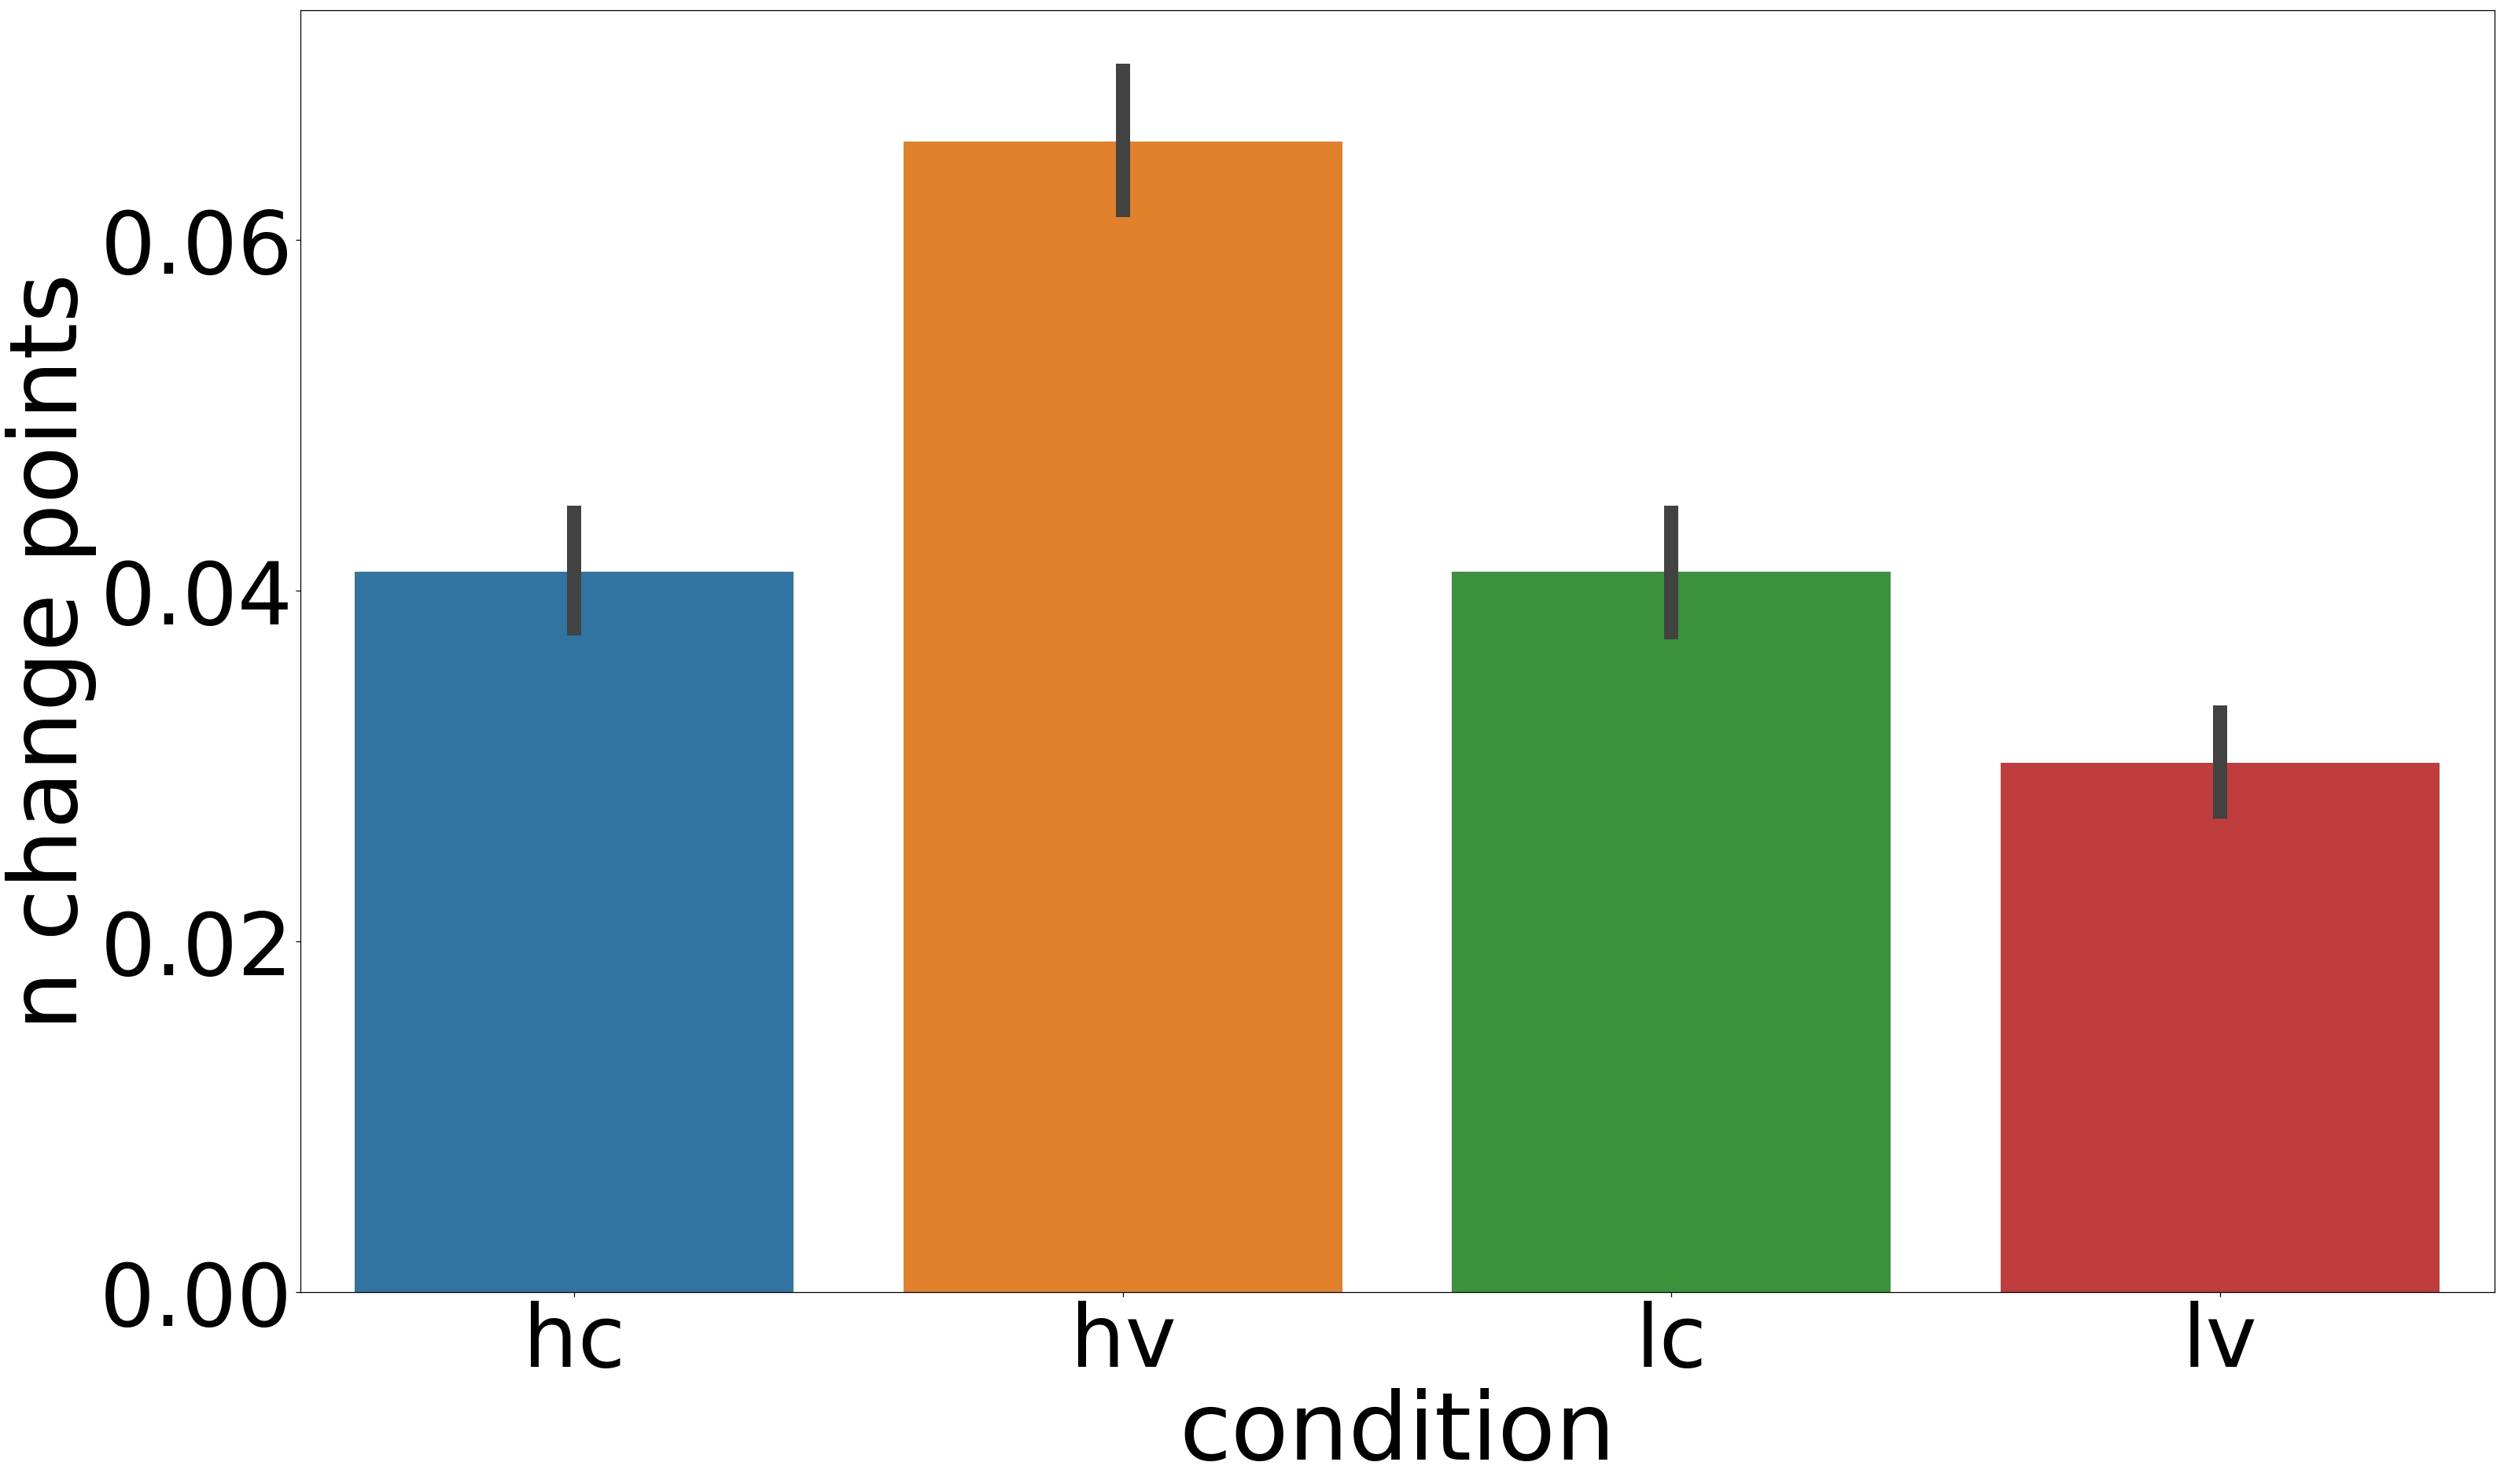

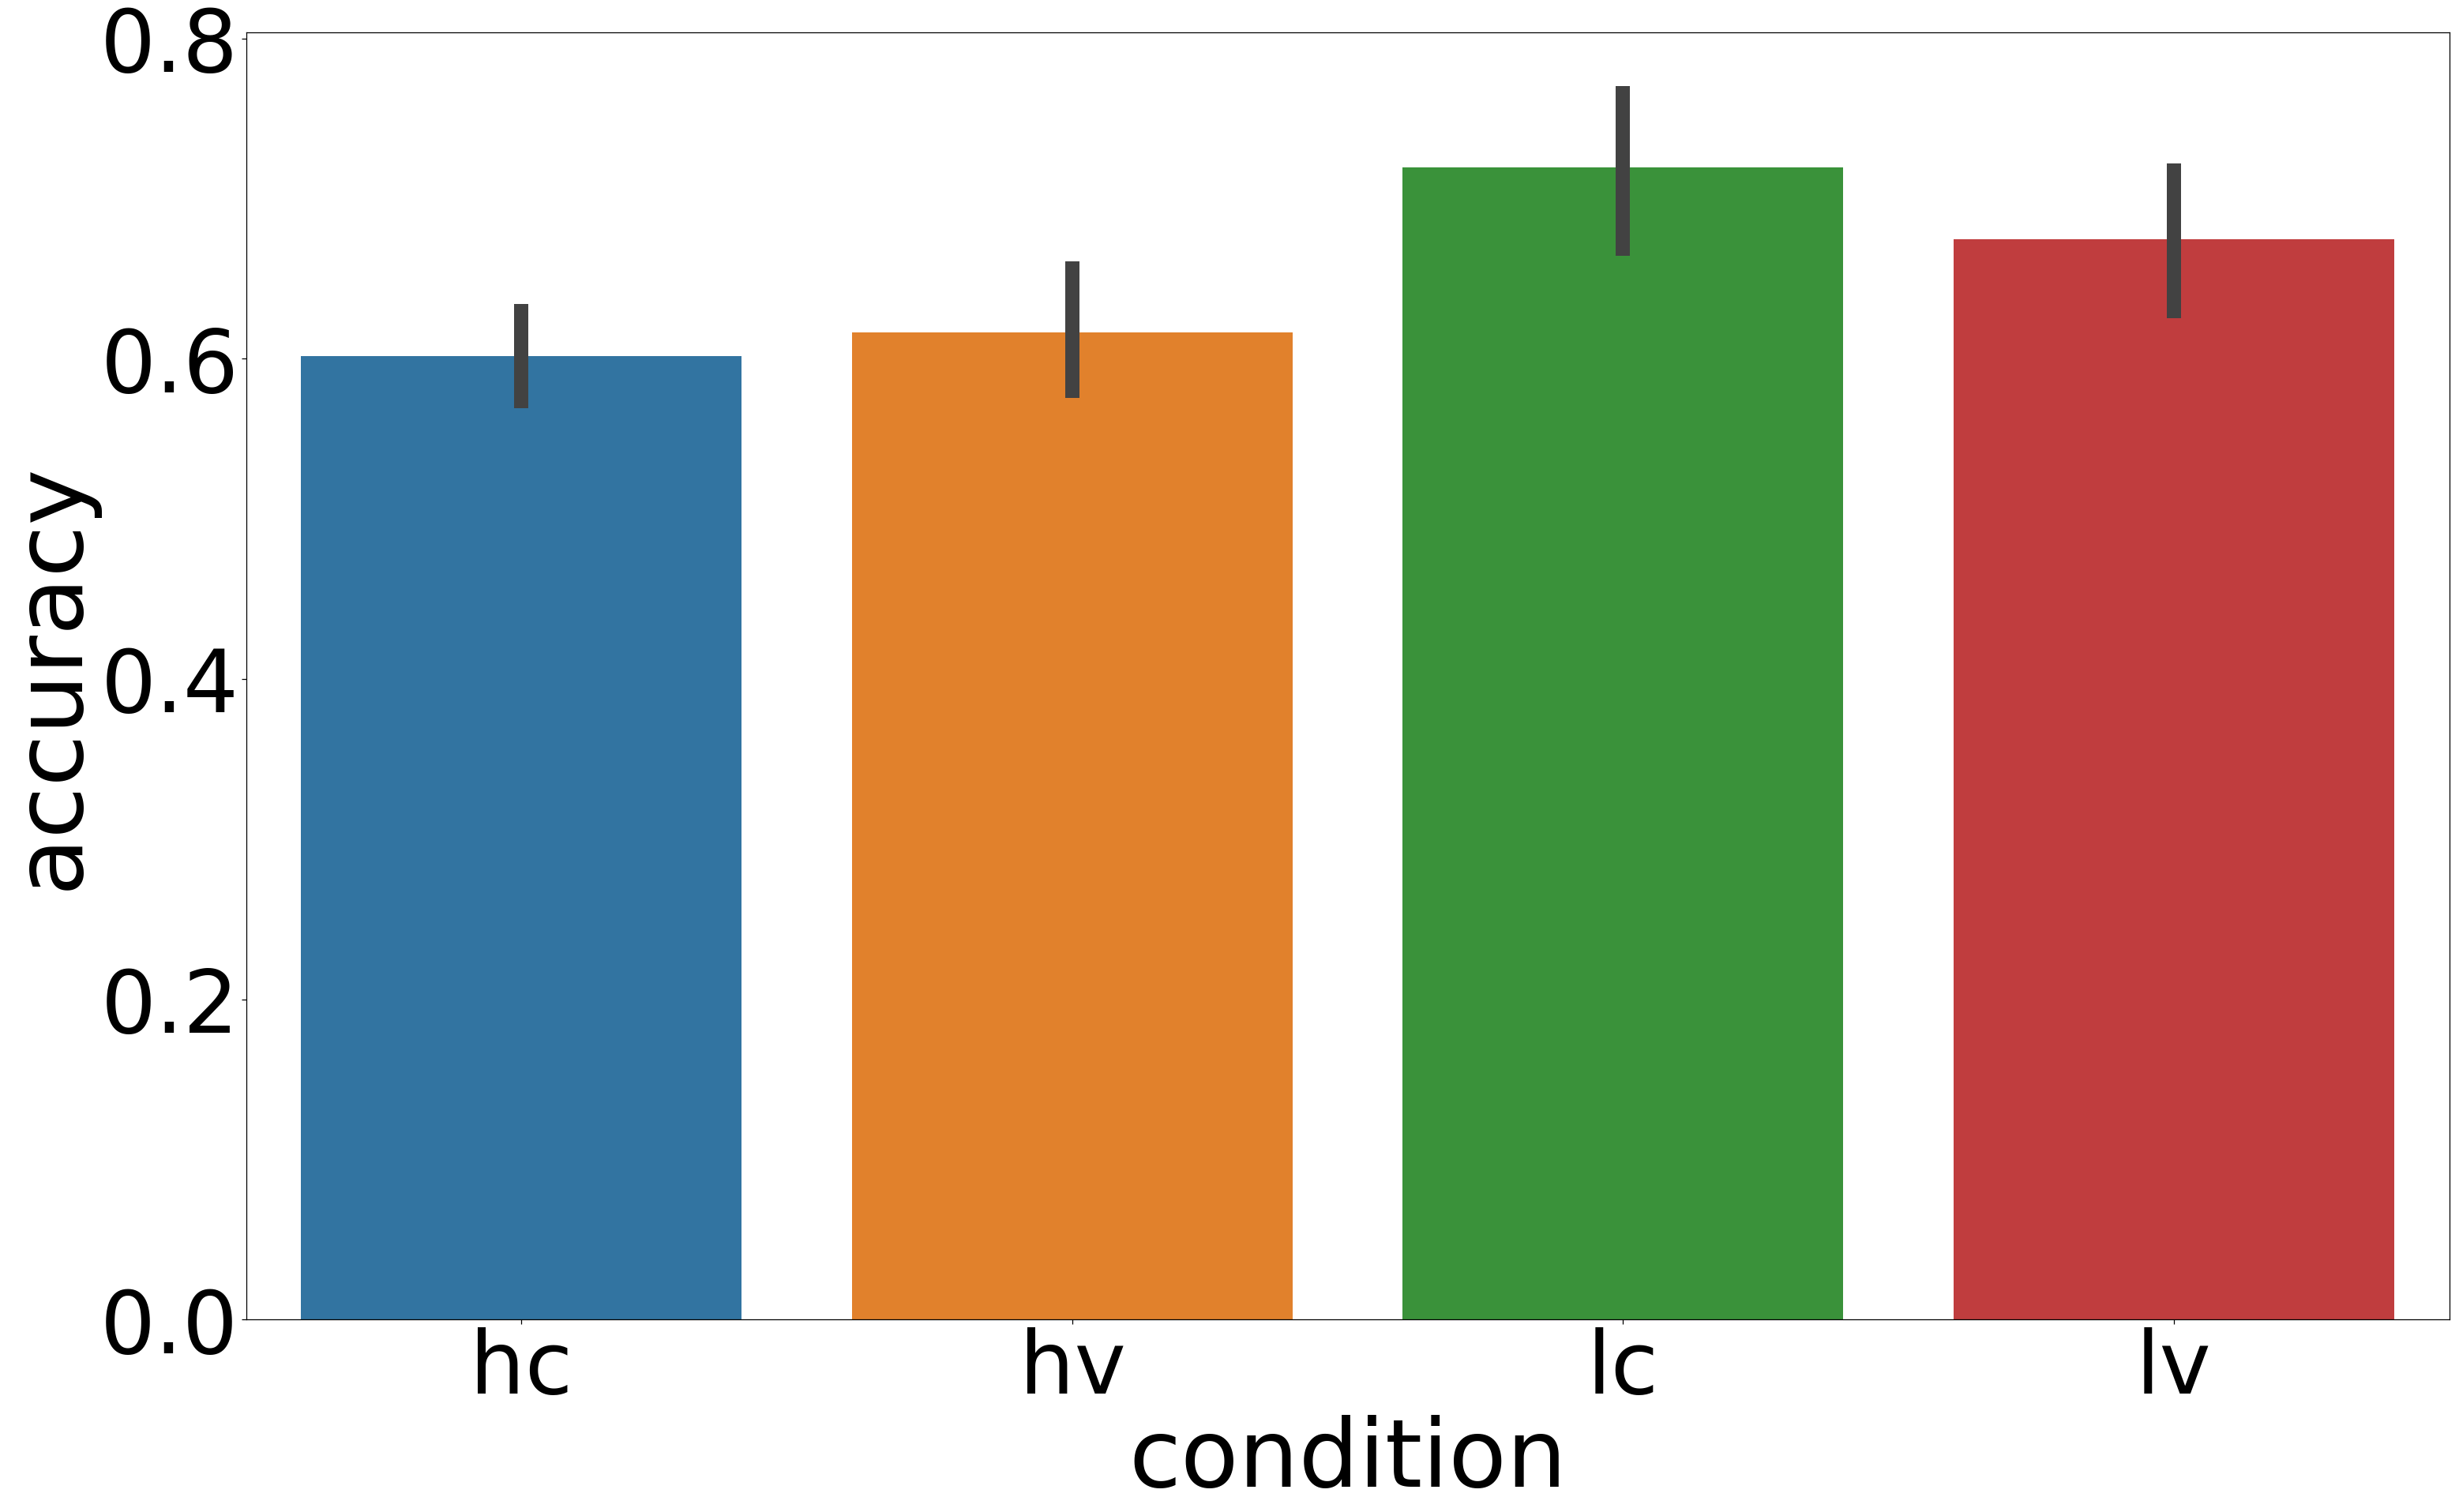

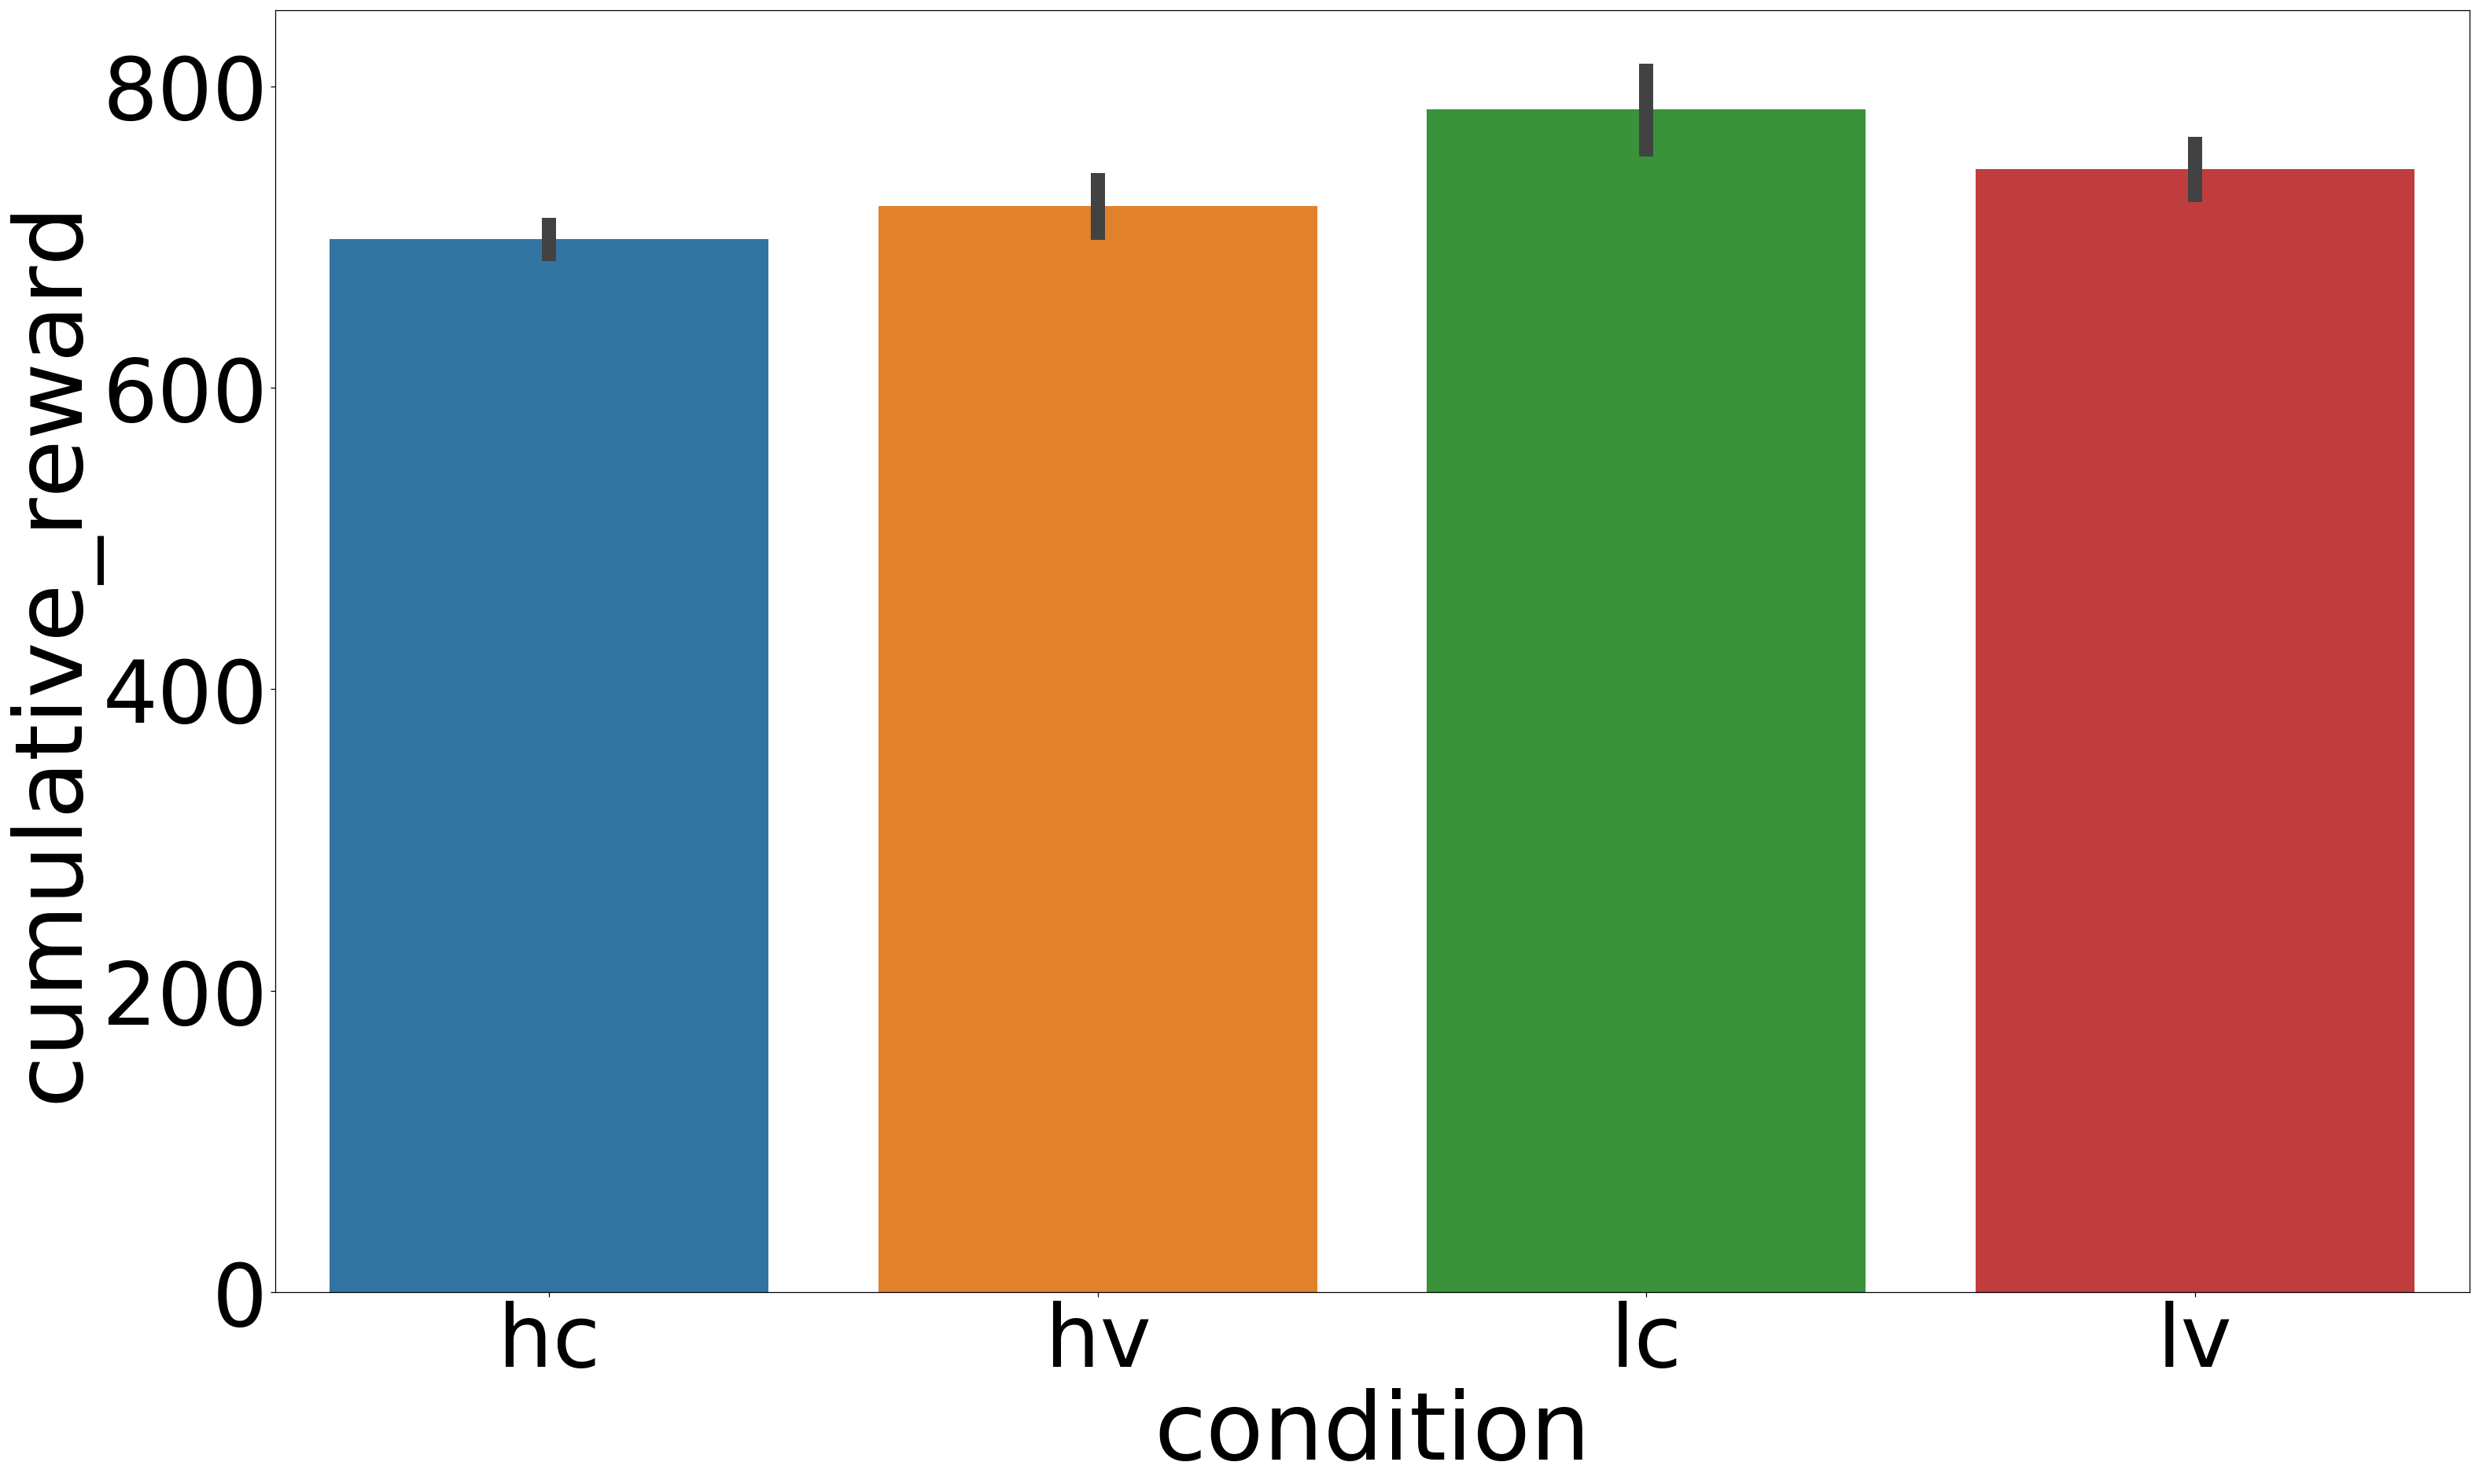

In [9]:
plt.figure(figsize=(50,30))
sns.barplot(x="condition",y="cp_with_slow_fast", data=test_data, ci=95, n_boot=1000, units="ID" )
plt.ylabel('n change points')

plt.figure(figsize=(50,30))
sns.barplot(x="condition",y="p_id_accuracy", data=test_data, ci=95, n_boot=1000, units="ID")
plt.ylabel('accuracy')

plt.figure(figsize=(50,30))
sns.barplot(x="condition",y="cumulative_reward", data=test_data, ci=95, n_boot=1000,units="ID")
plt.ylabel('cumulative_reward')

Text(0,0.5,'$\\Delta B$')

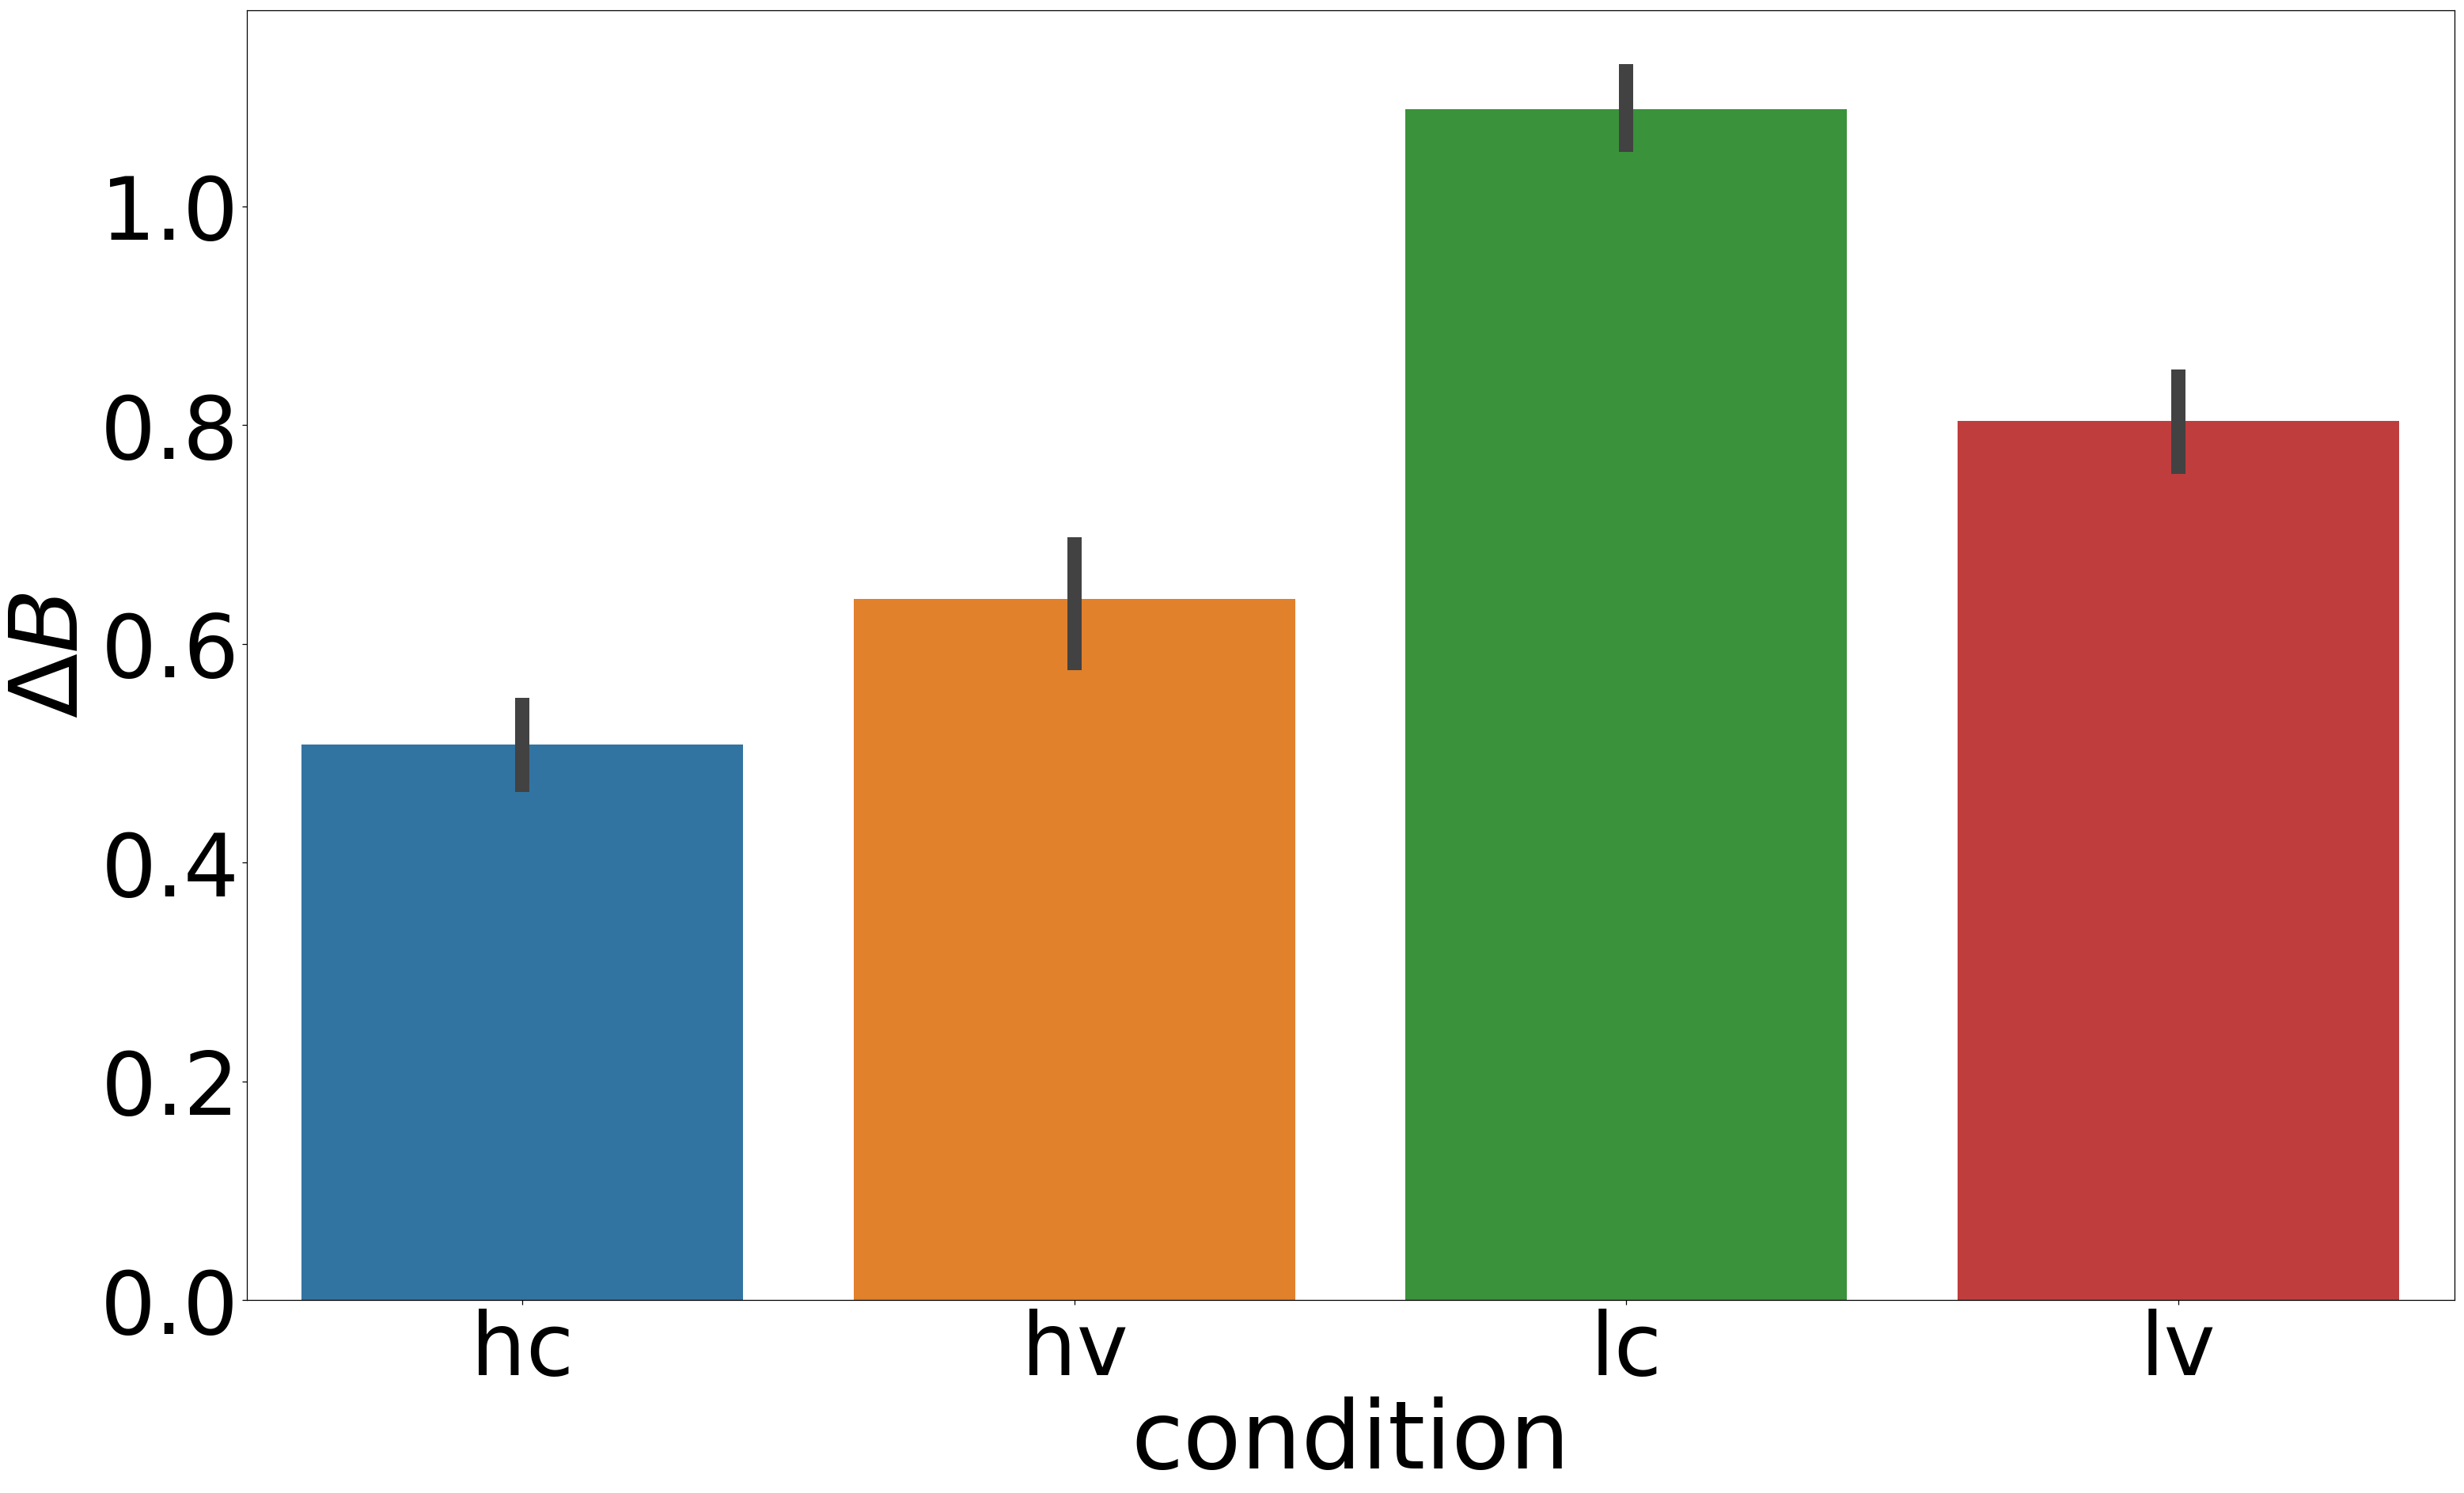

In [10]:
#do a reg. with deltaB as the dv and CPP as the predictor
plt.figure(figsize=(50,30))
sns.barplot(x="condition",y="ideal_B", data=all_obs_data, ci=95, n_boot=1000,units="ID")
plt.ylabel('$\Delta B$')

Text(0,0.5,'$\\Omega$')

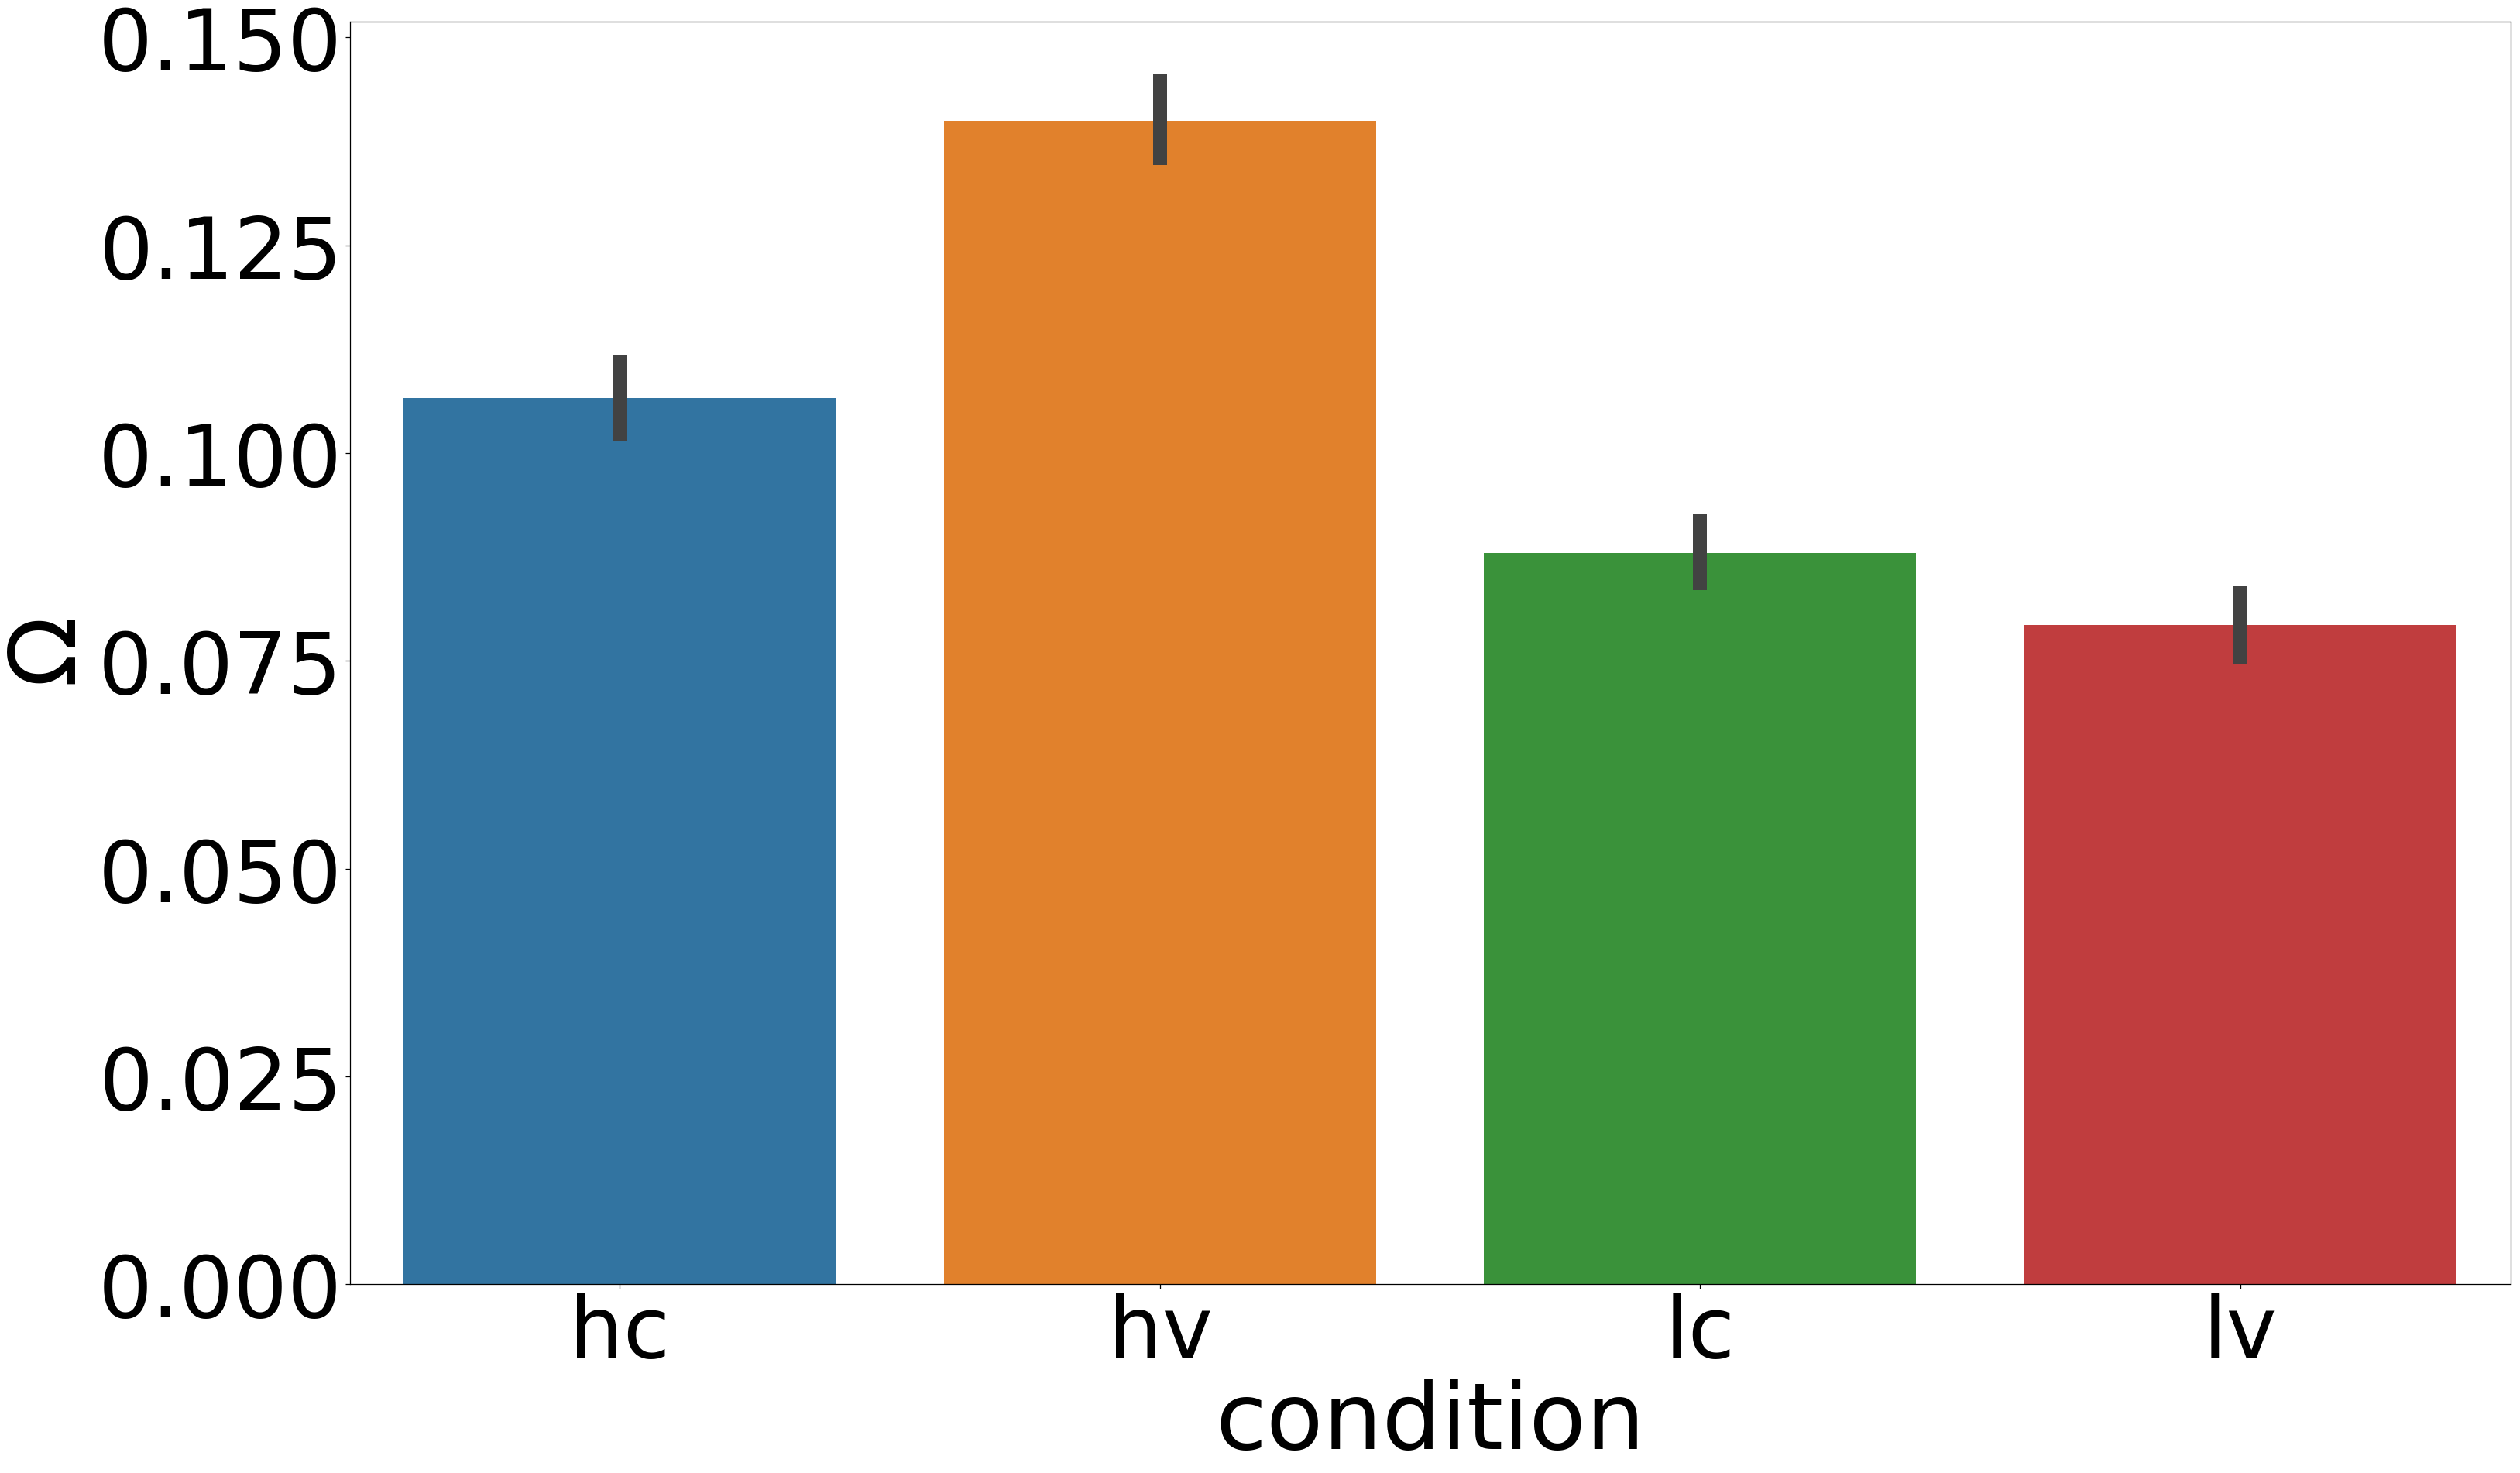

In [11]:
plt.figure(figsize=(50,30))
sns.barplot(x="condition",y="cpp", data=all_obs_data, ci=95, n_boot=1000,units="ID")
plt.ylabel('$\Omega$')

In [12]:
np.unique(all_obs_data.id_choice)

array([111, 112])

In [13]:
all_obs_data.loc[all_obs_data.id_choice == 111, 'id_choice'] = 0
all_obs_data.loc[all_obs_data.id_choice == 112, 'id_choice'] = 1

In [14]:
all_obs_data.loc[all_obs_data.p_id_solution == 111, 'p_id_solution'] = 0
all_obs_data.loc[all_obs_data.p_id_solution == 112, 'p_id_solution'] = 1

In [15]:
all_obs_data_sample_lc = all_obs_data[(all_obs_data.condition == 'lc') & (all_obs_data.ID == 761)] 

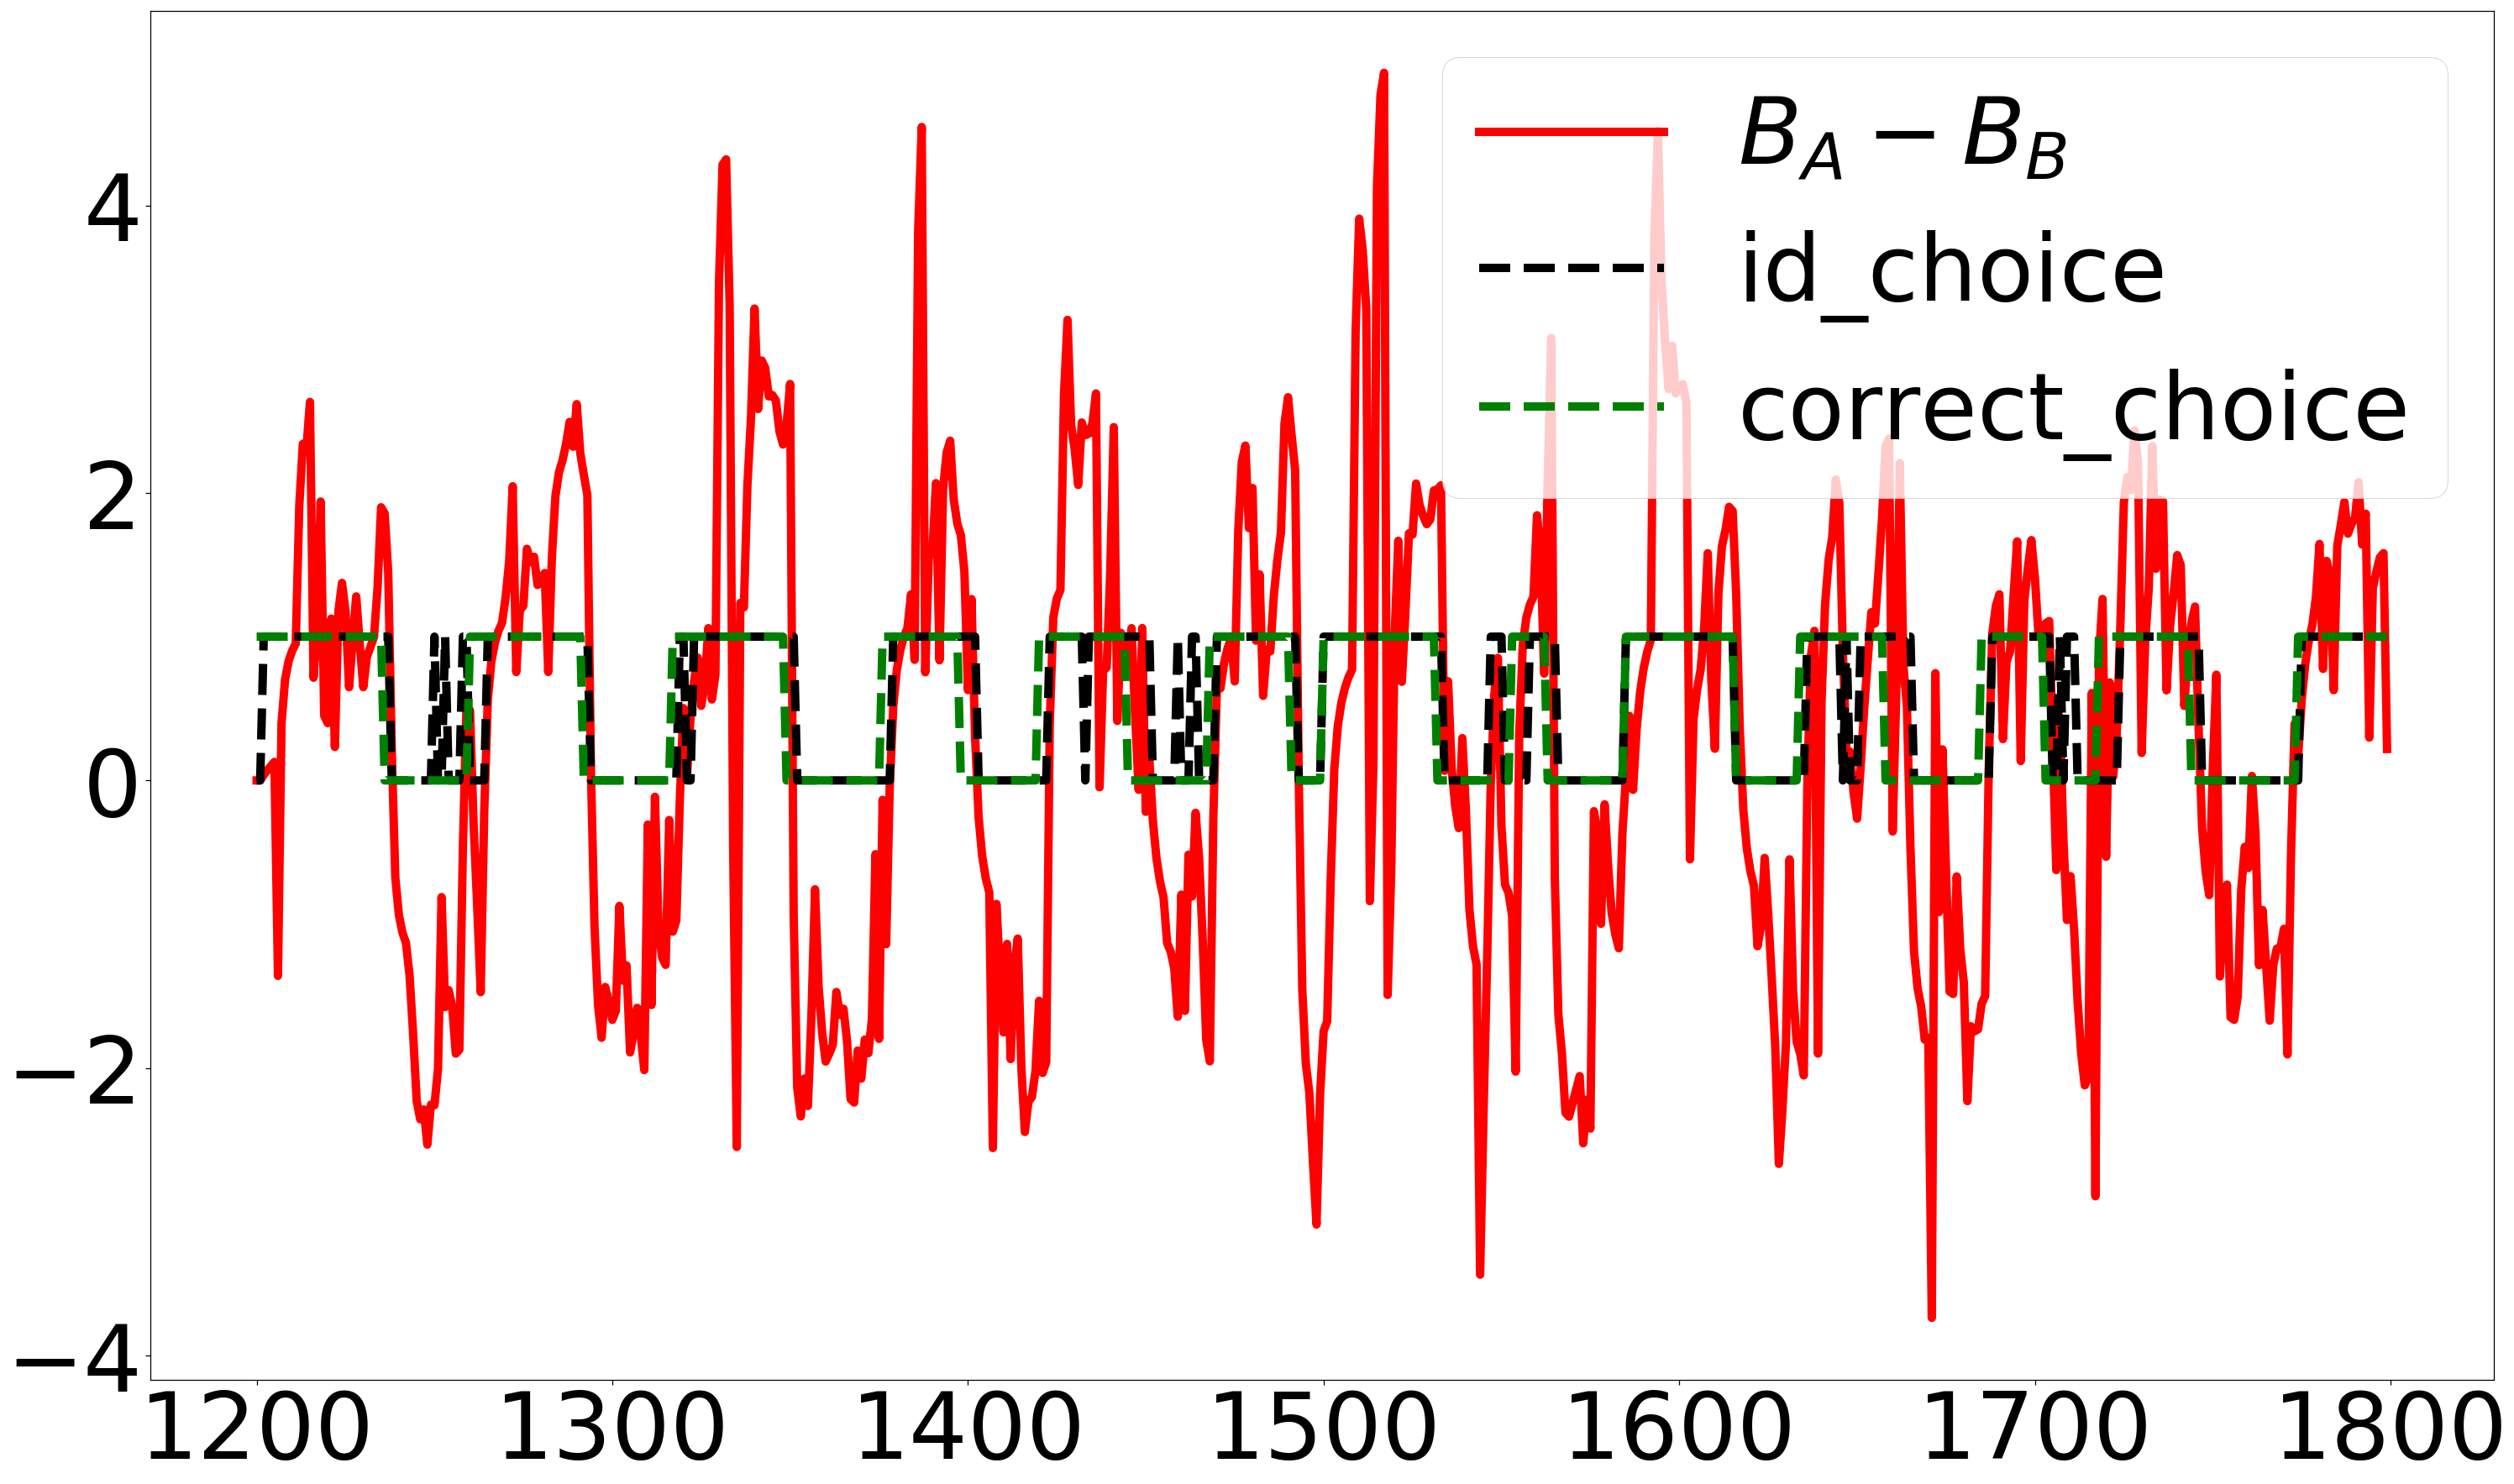

In [16]:
#use a low conflict sample to test direction
plt.figure(figsize=(50,30))
plt.plot(all_obs_data_sample_lc.target_B, 'r', label='$B_{A} - B_{B}$')
plt.plot(all_obs_data_sample_lc.id_choice, 'k--', label='id_choice')
plt.plot(all_obs_data_sample_lc.p_id_solution, 'g--', label='correct_choice')
plt.legend()

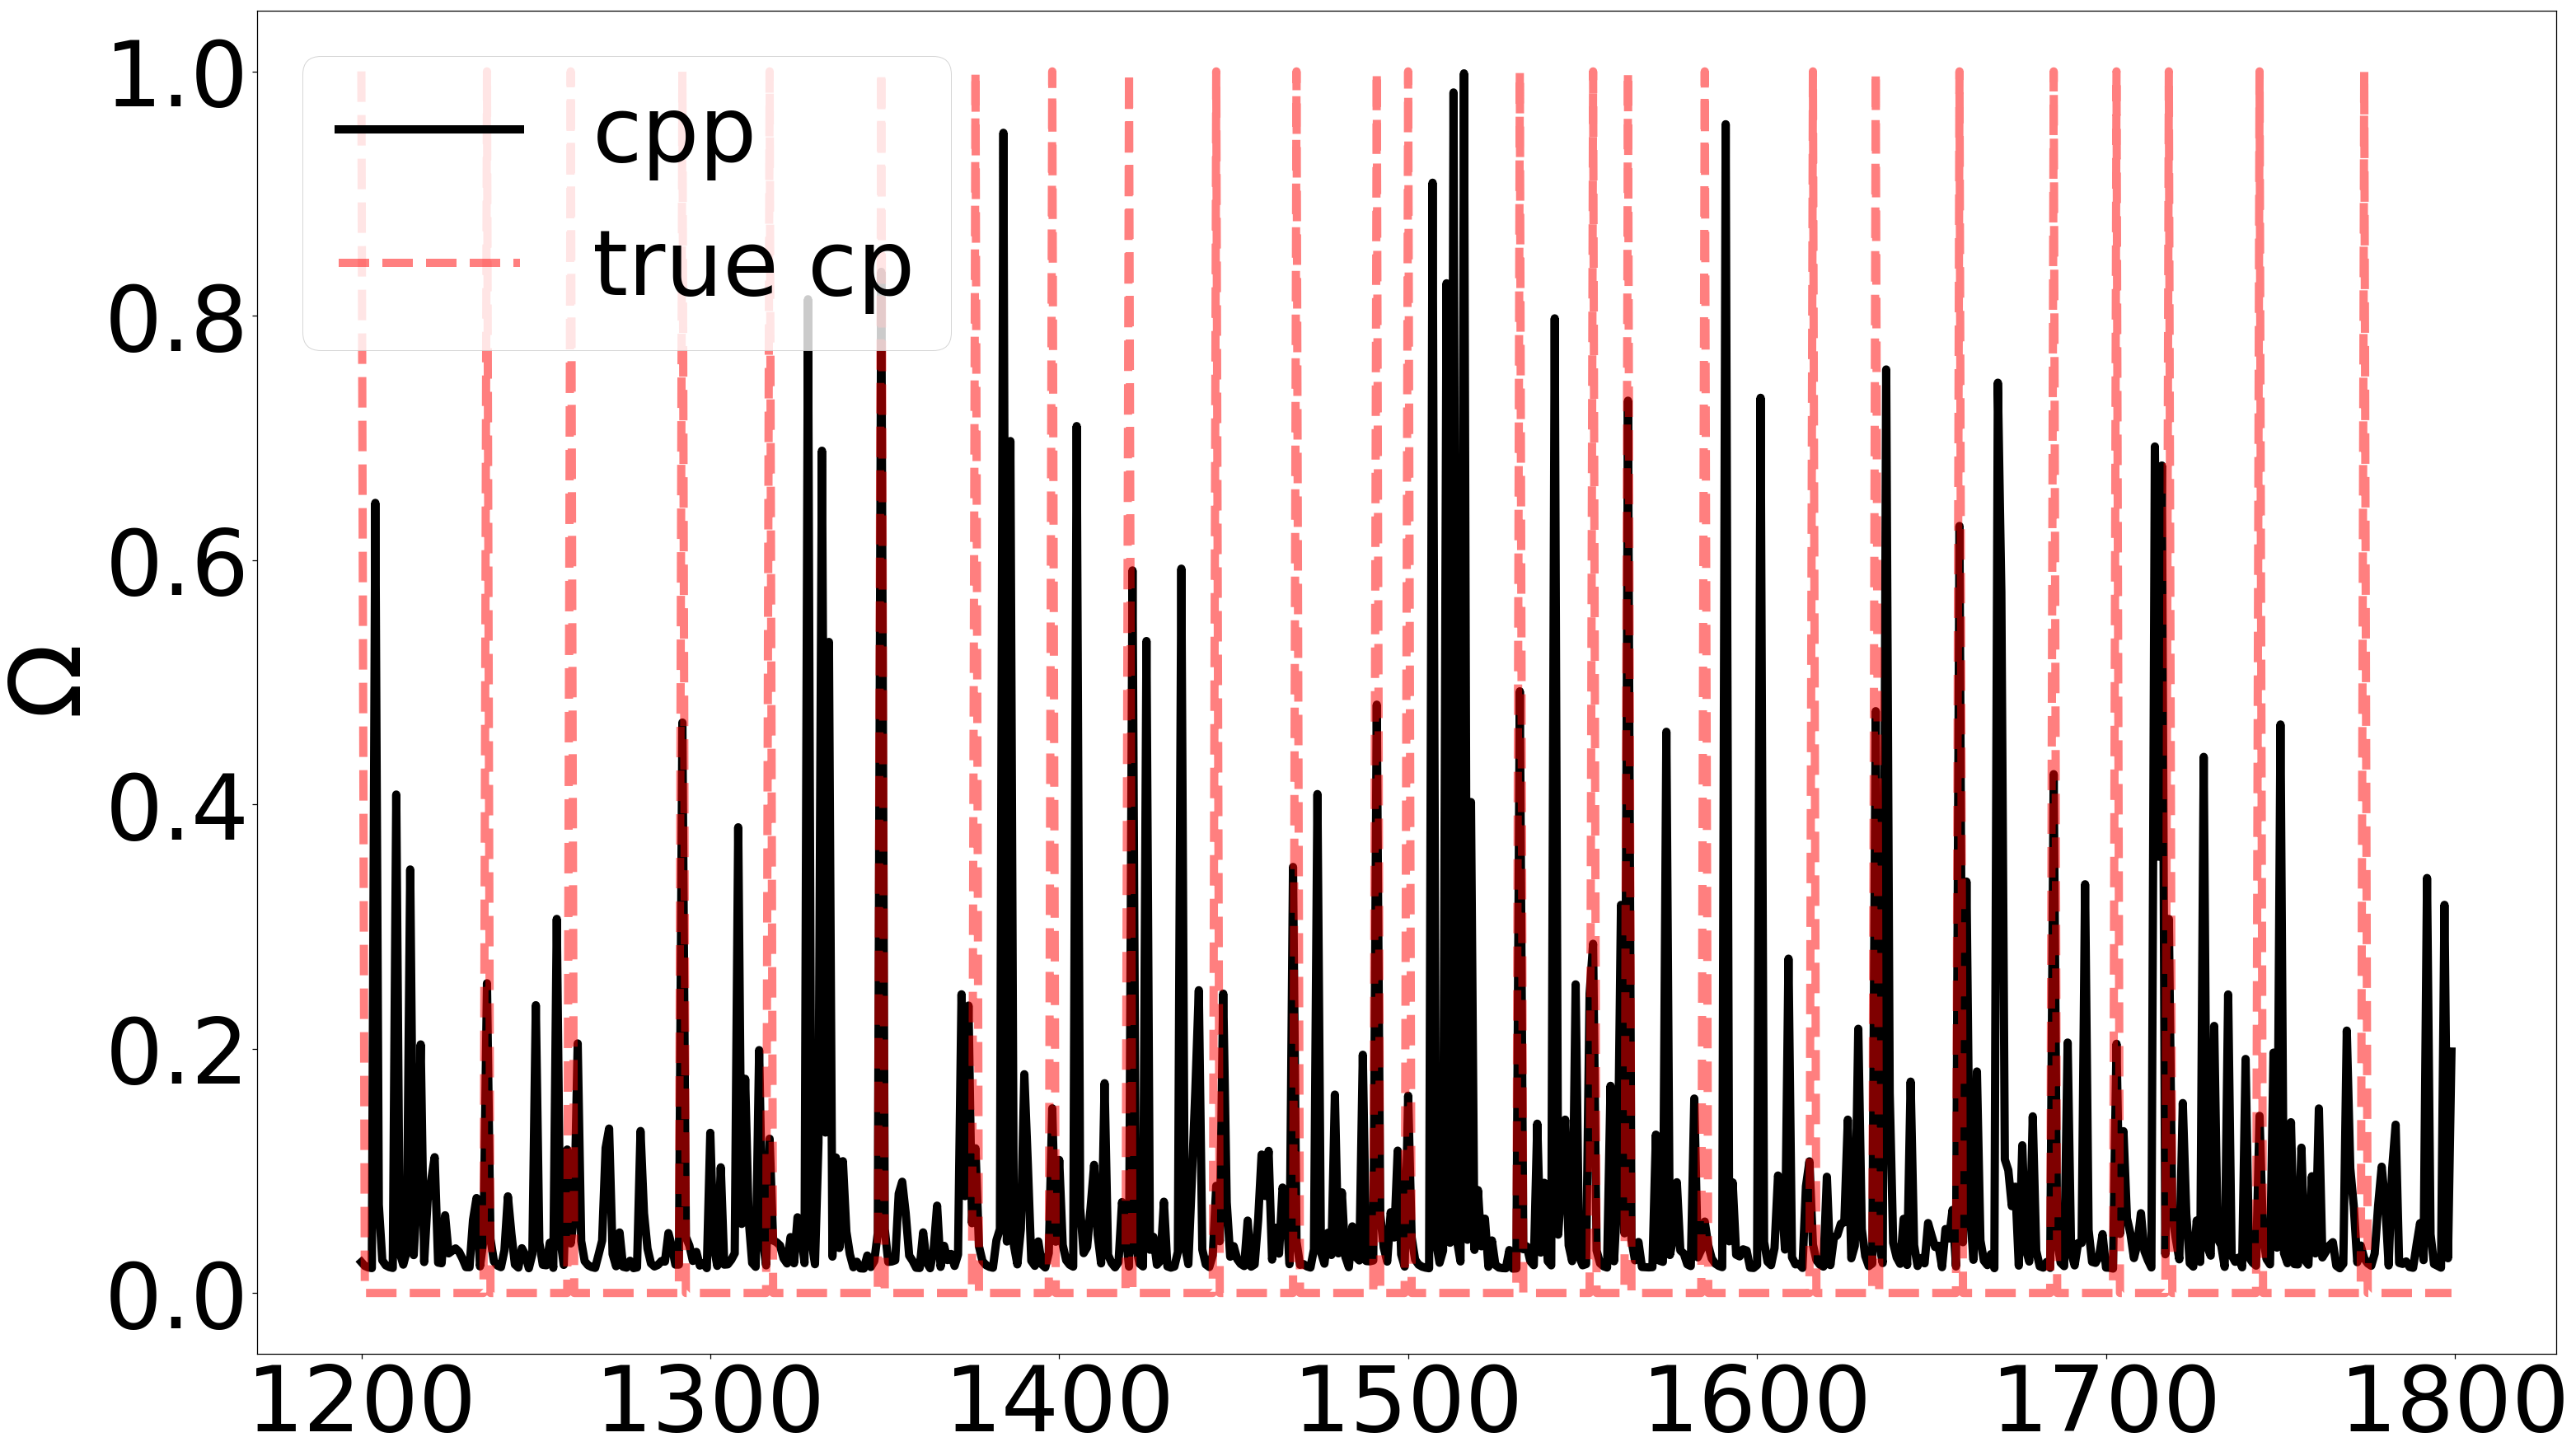

In [17]:
plt.figure(figsize=(50,30))
plt.plot(all_obs_data_sample_lc.cpp[0:600], 'k', label='cpp')
plt.plot(all_obs_data_sample_lc.cp[0:600], 'r--', alpha=0.5, label='true cp')
plt.ylabel('$\Omega$')
plt.legend(frameon=1,loc='upper left')

In [18]:
#use target choice as response 
#include correct target choice as stimulus 
all_obs_data = all_obs_data.rename(index=str, columns={"p_id_accuracy": "response", 
                                                       "p_id_solution": "stimulus",
                                                        "ID": "subj_idx"})
all_obs_data = all_obs_data[['response', 'stimulus', 'rt', 'condition', 
                             'subj_idx', 'ideal_B', 'cpp']] 
# #use target-based belief in reward difference (b_t0 - b_t1)
all_obs_data = all_obs_data.rename(index=str, columns={'ideal_B': 'B'})
# all_obs_data = all_obs_data[(all_obs_data.rt<0.6)]
# all_obs_data.reset_index(drop=True, inplace=True)

In [19]:
all_obs_data['condition'] = all_obs_data['condition'].str.strip()
all_obs_data.head()

response  stimulus        rt condition  subj_idx         B       cpp
0         1         0  0.711570        hc       761  0.000000  0.099471
1         0         0  0.681410        hc       761 -1.241007  0.035079
2         1         0  0.767118        hc       761 -0.595781  0.023075
3         0         0  0.507209        hc       761 -0.306135  0.019881
4         1         0  0.656259        hc       761 -0.139394  0.018539

In [20]:
np.unique(all_obs_data.subj_idx), np.unique(all_obs_data.condition), len(np.unique(all_obs_data.subj_idx)),len(np.unique(all_obs_data.condition))

(array([761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773,
        774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784]),
 array(['hc', 'hv', 'lc', 'lv'], dtype=object),
 24,
 4)

In [21]:
#columns for sparse df used for HDDM
all_obs_data.columns

Index(['response', 'stimulus', 'rt', 'condition', 'subj_idx', 'B', 'cpp'], dtype='object')

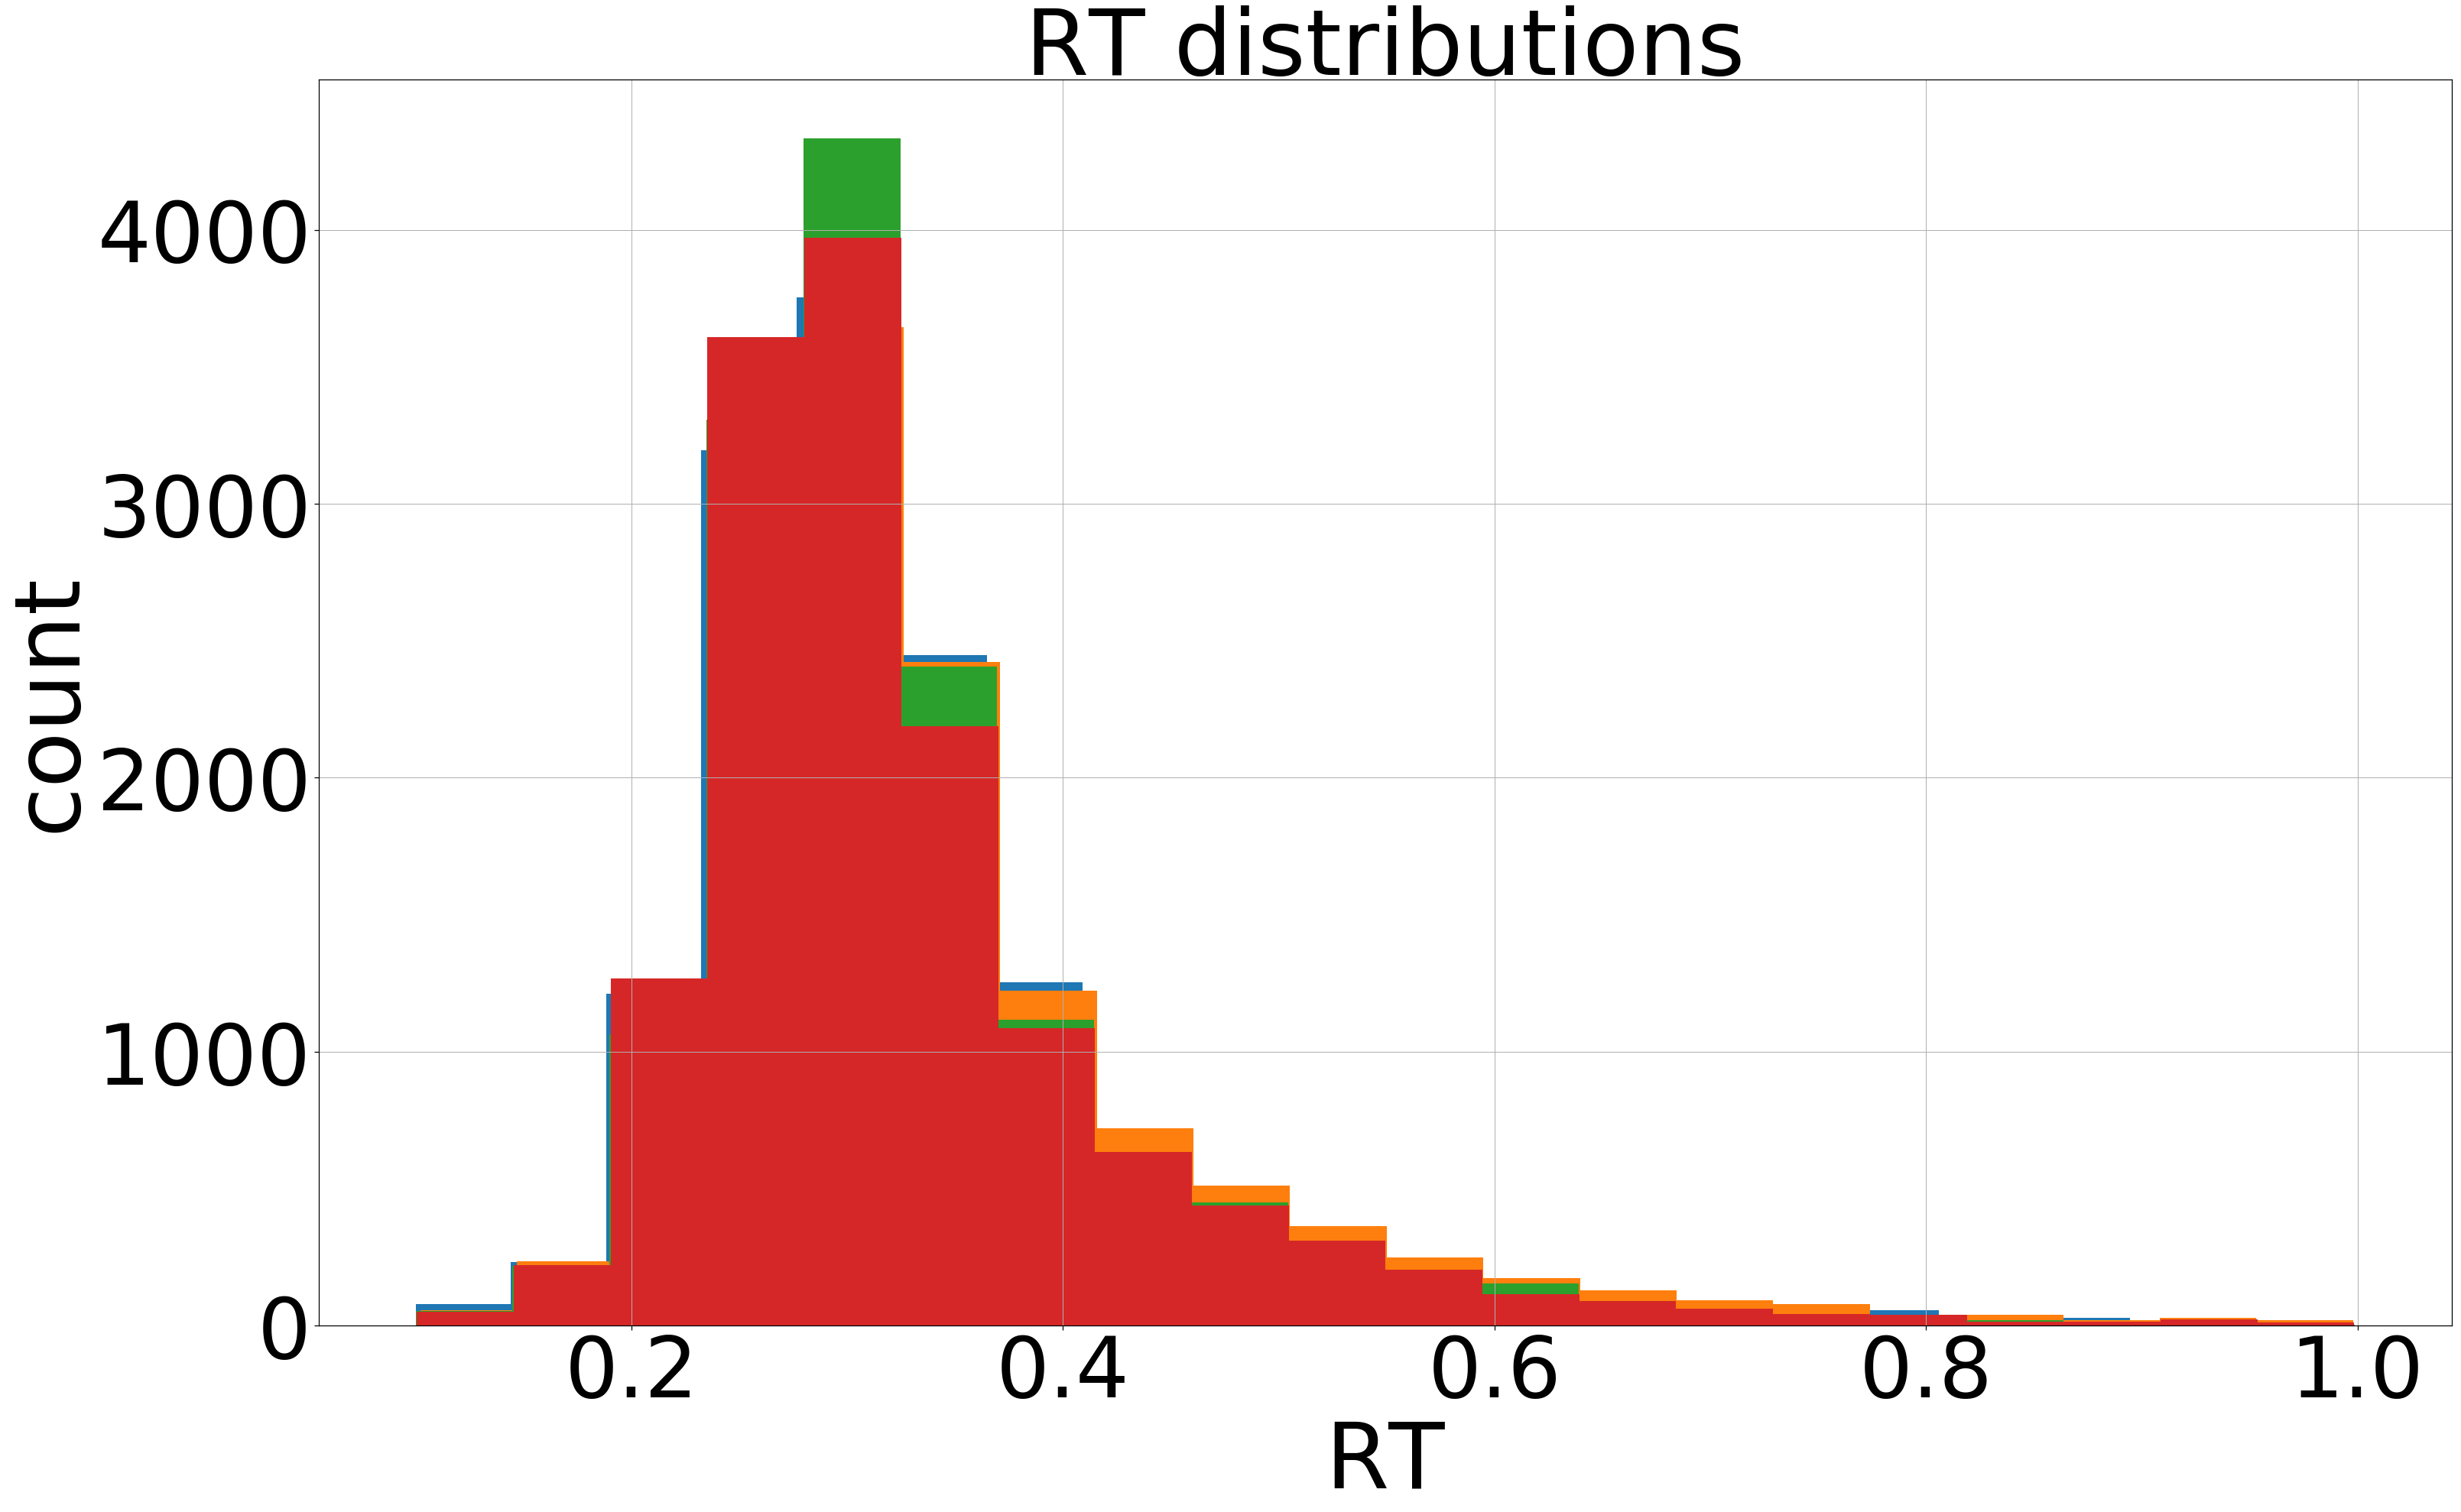

In [22]:
fig=plt.figure(figsize=(50,30))
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in all_obs_data.groupby('condition'):
    subj_data.rt.hist(bins=20, histtype='stepfilled', ax=ax)

Text(0,0.5,'B')

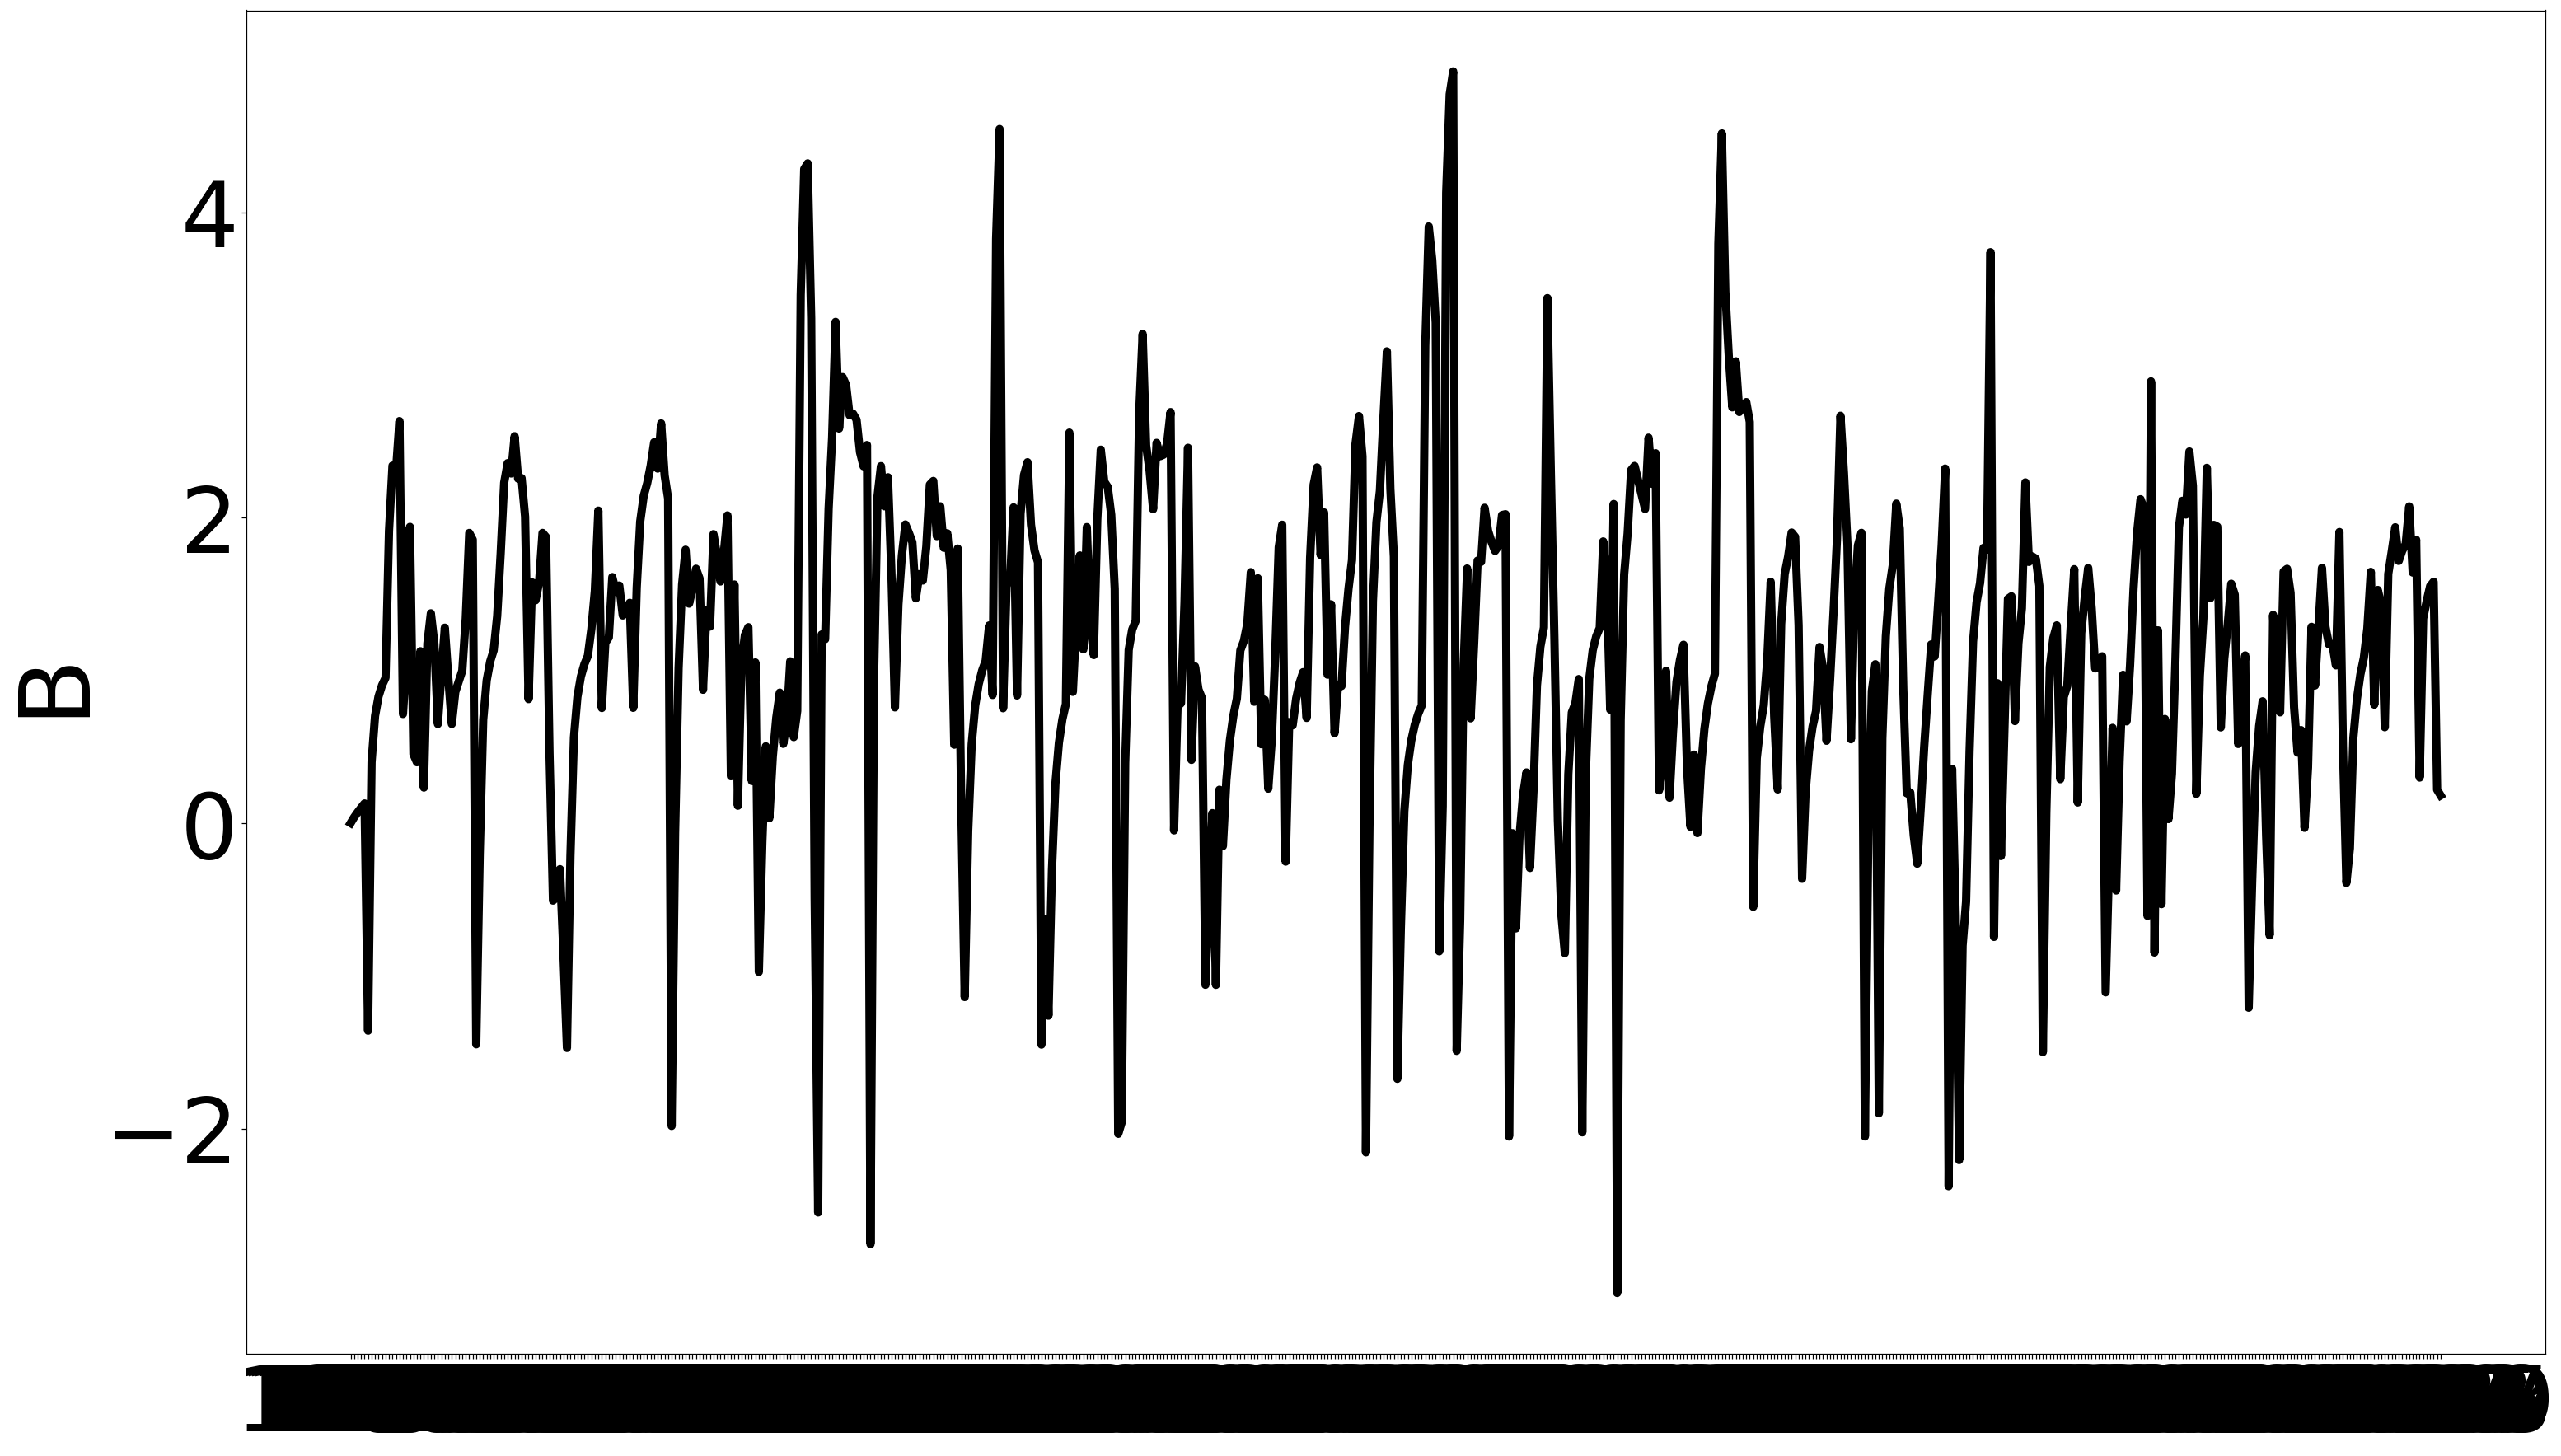

In [23]:
plt.figure(figsize=(50,30))
plt.plot(all_obs_data.B[(all_obs_data.subj_idx == 761) & (all_obs_data.condition == 'lc')], 'k')
plt.ylabel('B')

Text(0,0.5,'stimulus selected')

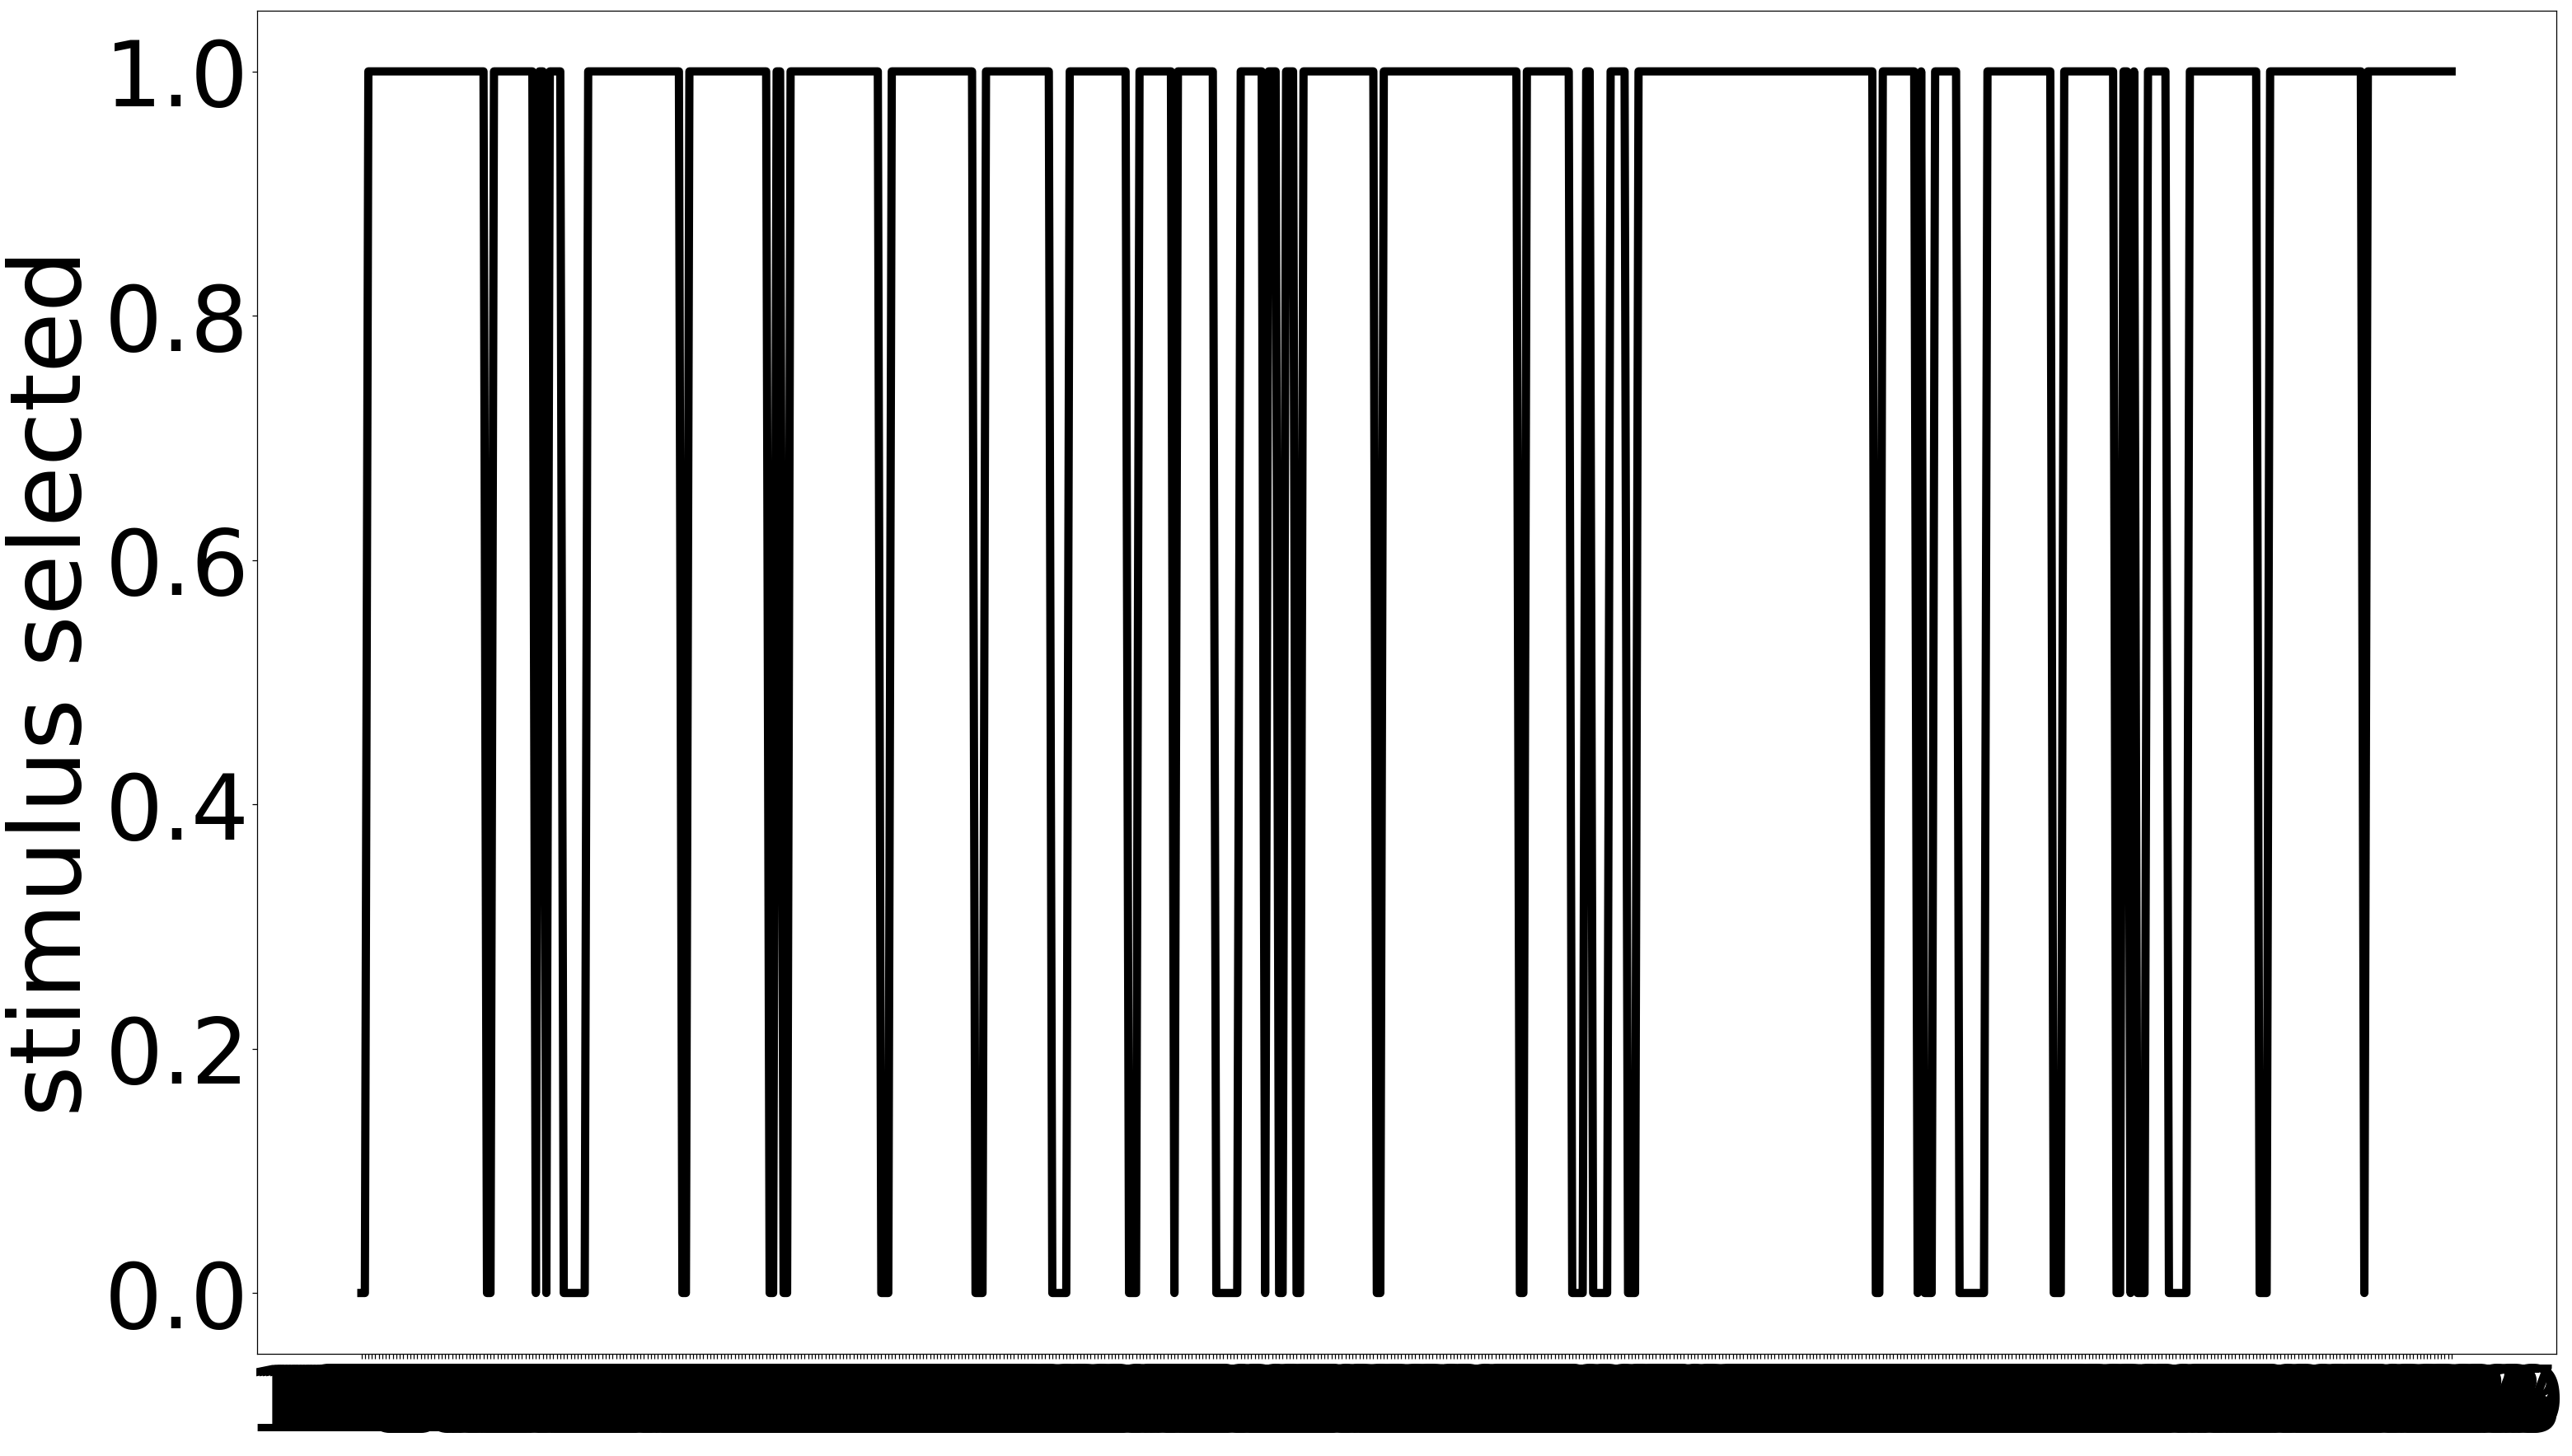

In [24]:
plt.figure(figsize=(50,30))
plt.plot(all_obs_data.response[(all_obs_data.subj_idx == 761) & (all_obs_data.condition == 'lc')], 'k')
plt.ylabel('stimulus selected')

Text(0,0.5,'obs. rt')

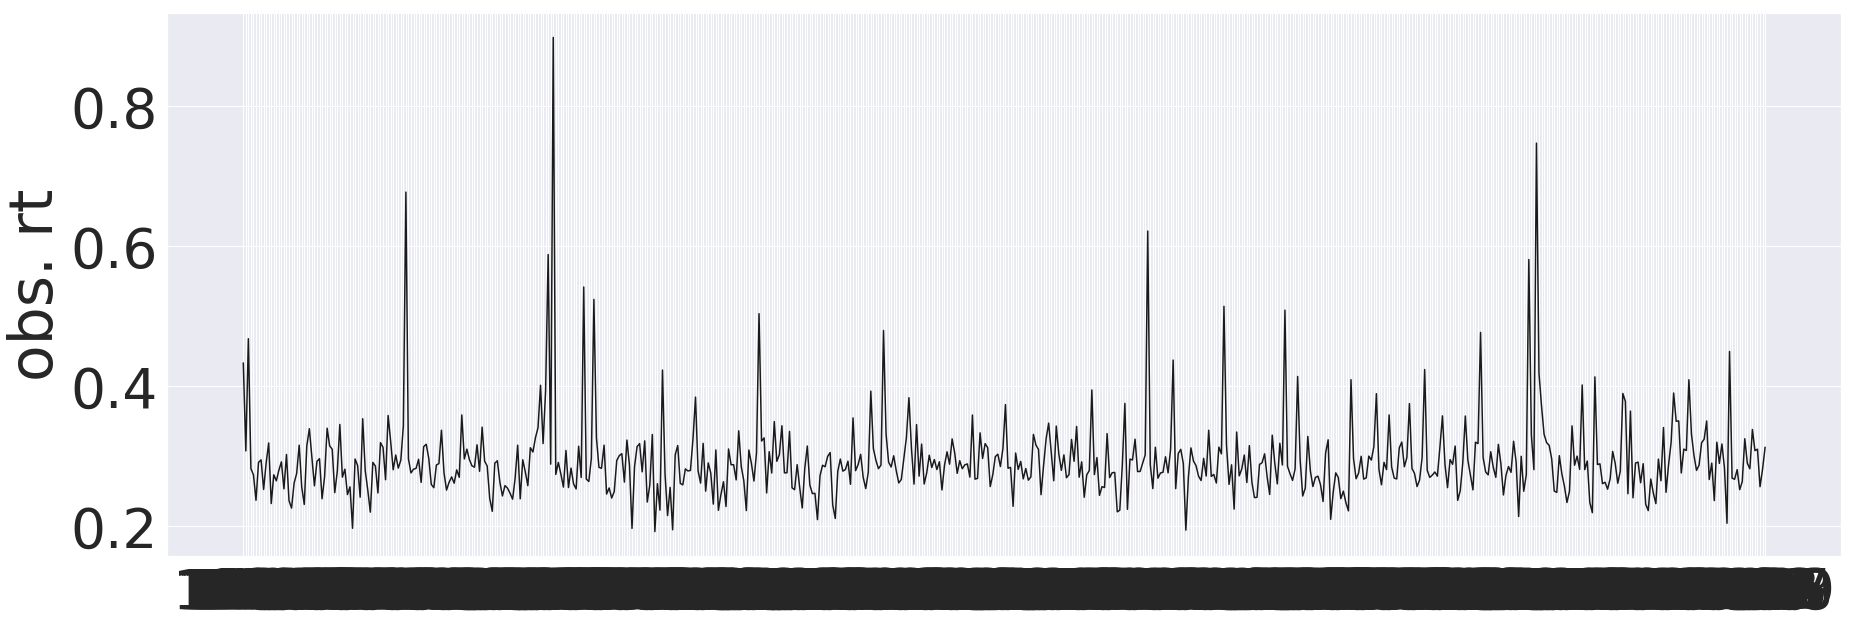

In [25]:
plt.rcParams['figure.figsize'] = 30, 10
sns.set(font_scale=5)
fig = plt.figure()
plt.plot(all_obs_data.rt[(all_obs_data.subj_idx == 761) & (all_obs_data.condition == 'lc')], 'k')
plt.ylabel('obs. rt')

Text(0,0.5,'correct stimulus')

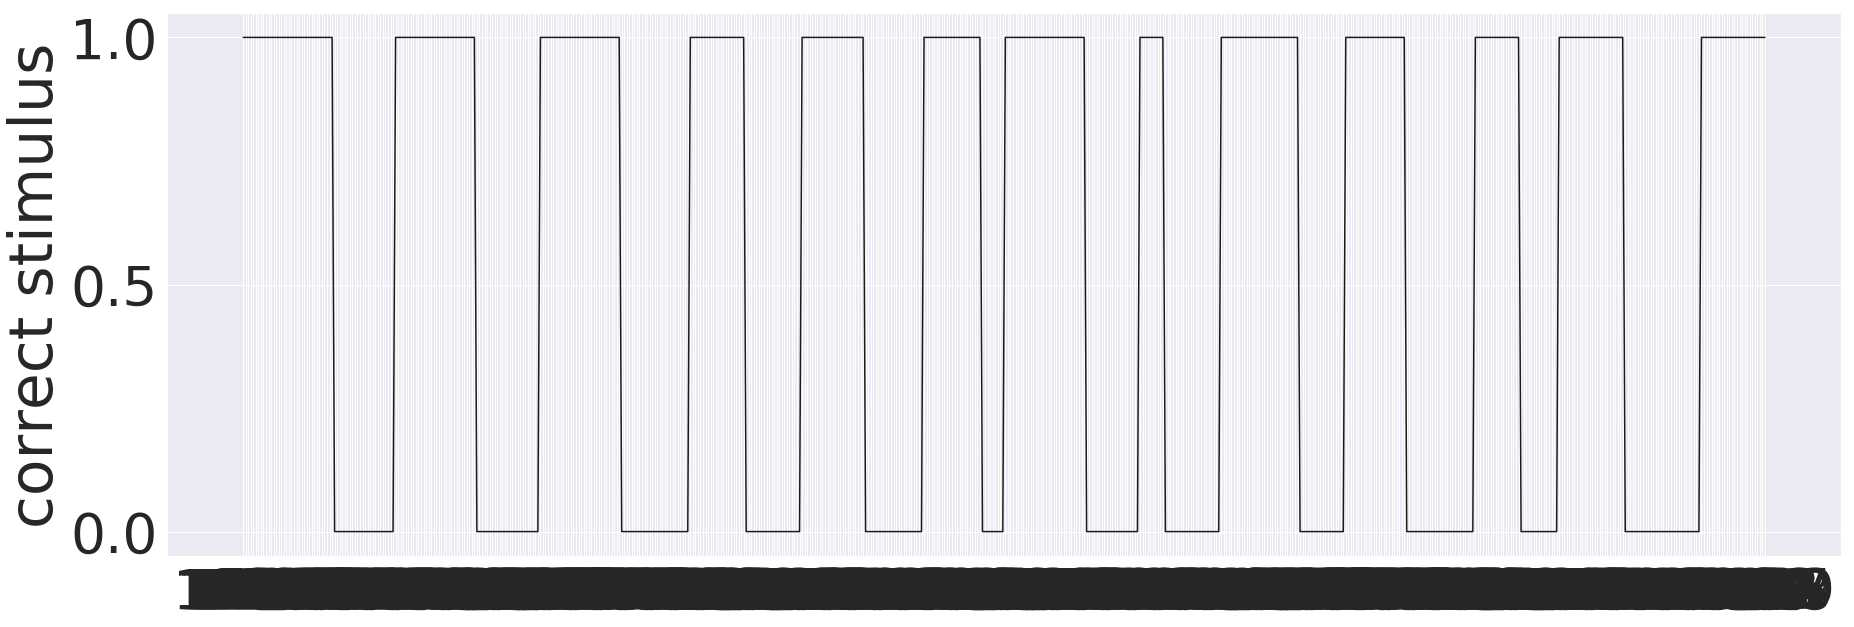

In [26]:
plt.rcParams['figure.figsize'] = 30, 10
sns.set(font_scale=5)
plt.plot(all_obs_data.stimulus[(all_obs_data.subj_idx == 761) & (all_obs_data.condition == 'lc')], 'k')
plt.ylabel('correct stimulus')

In [29]:
# n_samples, n_burned_samples, n_thin = 500, 50, 3
n_samples, n_burned_samples, n_thin = 1000, 50, 0

In [30]:
#intercept model
intercept_model=['a~1', 't~1', 'v~1', 'z~1'] #true intercept only; "flat", no predictors, but all parameters estimated (all parameters estimated in other reg. models, so only diff. is lack of predictors)
intercept_model = hddm.HDDMRegressor(all_obs_data, intercept_model, bias=True)
intercept_model.find_starting_values()
intercept_model.sample(n_samples, burn=n_burned_samples,   dbname='intercept_only_obs_reg_simple_acc.db',db='pickle')

Adding these covariates:
['a_Intercept']
Adding these covariates:
['t_Intercept']
Adding these covariates:
['v_Intercept']
Adding these covariates:
['z_Intercept']


/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 3329.3 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

In [31]:
a_cpp_t_B_obs_reg = hddm.HDDMRegressor(all_obs_data,['a~cpp','t~B'], bias=True)
a_cpp_t_B_obs_reg.find_starting_values()
a_cpp_t_B_obs_reg.sample(n_samples,burn=n_burned_samples,   dbname='a_cpp_t_B_obs_reg_simple_acc.db', db='pickle')

Adding these covariates:
['a_Intercept', 'a_cpp']
Adding these covariates:
['t_Intercept', 't_B']


/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 2722.9 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

In [32]:
a_cpp_v_B_obs_reg = hddm.HDDMRegressor(all_obs_data,['a~cpp', 'v~B'],bias=True)
a_cpp_v_B_obs_reg.find_starting_values()
a_cpp_v_B_obs_reg.sample(n_samples,burn=n_burned_samples,   dbname='a_cpp_v_B_obs_reg_simple_acc.db', db='pickle')

Adding these covariates:
['a_Intercept', 'a_cpp']
Adding these covariates:
['v_Intercept', 'v_B']


/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 2445.0 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

In [33]:
t_cpp_a_B_obs_reg = hddm.HDDMRegressor(all_obs_data,[ 't~cpp', 'a~B'],bias=True)
t_cpp_a_B_obs_reg.find_starting_values()
t_cpp_a_B_obs_reg.sample(n_samples,burn=n_burned_samples,   dbname='t_cpp_a_B_obs_reg_simple_acc.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp']
Adding these covariates:
['a_Intercept', 'a_B']


/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 2939.2 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

In [34]:
t_cpp_v_B_obs_reg = hddm.HDDMRegressor(all_obs_data,[ 't~cpp', 'v~B'],bias=True)
t_cpp_v_B_obs_reg.find_starting_values()
t_cpp_v_B_obs_reg.sample(n_samples,burn=n_burned_samples,   dbname='t_cpp_v_B_obs_reg_simple_acc.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp']
Adding these covariates:
['v_Intercept', 'v_B']


/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 3081.3 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

In [35]:
v_cpp_a_B_obs_reg = hddm.HDDMRegressor(all_obs_data,[ 'v~cpp', 'a~B'],bias=True)
v_cpp_a_B_obs_reg.find_starting_values()
v_cpp_a_B_obs_reg.sample(n_samples,burn=n_burned_samples,   dbname='v_cpp_a_B_obs_reg_simple_acc.db', db='pickle')

Adding these covariates:
['v_Intercept', 'v_cpp']
Adding these covariates:
['a_Intercept', 'a_B']


/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 2640.2 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

In [37]:
v_cpp_t_B_obs_reg = hddm.HDDMRegressor(all_obs_data,[ 'v~cpp', 't~B'],bias=True)
v_cpp_t_B_obs_reg.find_starting_values()
v_cpp_t_B_obs_reg.sample(n_samples,burn=n_burned_samples, dbname='v_cpp_t_B_obs_reg_simple_acc.db', db='pickle')

Adding these covariates:
['v_Intercept', 'v_cpp']
Adding these covariates:
['t_Intercept', 't_B']


/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 3150.7 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

# All $z$ models 

In [38]:
z_cpp_a_B_obs_reg = hddm.HDDMRegressor(all_obs_data,['z~cpp','a~B'],bias=True)
z_cpp_a_B_obs_reg.find_starting_values()
z_cpp_a_B_obs_reg.sample(n_samples,burn=n_burned_samples,  dbname='z_cpp_a_B_obs_reg_simple_acc.db', db='pickle')

Adding these covariates:
['z_Intercept', 'z_cpp']
Adding these covariates:
['a_Intercept', 'a_B']


/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 2766.6 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

In [39]:
z_cpp_t_B_obs_reg = hddm.HDDMRegressor(all_obs_data,['z~cpp','t~B'],bias=True)
z_cpp_t_B_obs_reg.find_starting_values()
z_cpp_t_B_obs_reg.sample(n_samples,burn=n_burned_samples,   dbname='z_cpp_t_B_obs_reg_simple_acc.db', db='pickle')

Adding these covariates:
['z_Intercept', 'z_cpp']
Adding these covariates:
['t_Intercept', 't_B']


/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 3179.8 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

In [40]:
z_cpp_v_B_obs_reg = hddm.HDDMRegressor(all_obs_data,['z~cpp','v~B'],bias=True)
z_cpp_v_B_obs_reg.find_starting_values()
z_cpp_v_B_obs_reg.sample(n_samples,burn=n_burned_samples,   dbname='z_cpp_v_B_obs_reg_simple_acc.db', db='pickle')

Adding these covariates:
['z_Intercept', 'z_cpp']
Adding these covariates:
['v_Intercept', 'v_B']


/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 2792.0 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

In [41]:
a_cpp_z_B_obs_reg = hddm.HDDMRegressor(all_obs_data,['a~cpp','z~B'],bias=True)
a_cpp_z_B_obs_reg.find_starting_values()
a_cpp_z_B_obs_reg.sample(n_samples,burn=n_burned_samples,   dbname='a_cpp_z_B_obs_reg_simple_acc.db', db='pickle')

Adding these covariates:
['a_Intercept', 'a_cpp']
Adding these covariates:
['z_Intercept', 'z_B']


/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 2733.6 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

In [42]:
v_cpp_z_B_obs_reg = hddm.HDDMRegressor(all_obs_data,['v~cpp','z~B'],bias=True)
v_cpp_z_B_obs_reg.find_starting_values()
v_cpp_z_B_obs_reg.sample(n_samples,burn=n_burned_samples,   dbname='v_cpp_z_B_obs_reg_simple_acc.db', db='pickle')

Adding these covariates:
['v_Intercept', 'v_cpp']
Adding these covariates:
['z_Intercept', 'z_B']


/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 3063.1 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

In [43]:
t_cpp_z_B_obs_reg = hddm.HDDMRegressor(all_obs_data,['t~cpp','z~B'],bias=True)
t_cpp_z_B_obs_reg.find_starting_values()
t_cpp_z_B_obs_reg.sample(n_samples,burn=n_burned_samples,   dbname='t_cpp_z_B_obs_reg_simple_acc.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp']
Adding these covariates:
['z_Intercept', 'z_B']


/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 3352.1 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

# Save models 

In [ ]:
# a_cpp_t_B_obs_reg_simple=hddm.load(write_dir+'a_cpp_t_B_obs_reg_simple_acc')
# a_cpp_v_B_obs_reg_simple=hddm.load(write_dir+'a_cpp_v_B_obs_reg_simple')
# t_cpp_a_B_obs_reg_simple=hddm.load(write_dir+'t_cpp_a_B_obs_reg_simple')

# t_cpp_v_B_obs_reg_simple=hddm.load(write_dir+'t_cpp_v_B_obs_reg_simple')
# v_cpp_a_B_obs_reg_simple=hddm.load(write_dir+'v_cpp_a_B_obs_reg_simple')
# v_cpp_t_B_obs_reg_simple=hddm.load(write_dir+'v_cpp_t_B_obs_reg_simple')

In [44]:
#save models... many many samples, much time
a_cpp_t_B_obs_reg.save(write_dir+'a_cpp_t_B_obs_reg_simple_acc')
a_cpp_v_B_obs_reg.save(write_dir+'a_cpp_v_B_obs_reg_simple_acc')
t_cpp_a_B_obs_reg.save(write_dir+'t_cpp_a_B_obs_reg_simple_acc')

t_cpp_v_B_obs_reg.save(write_dir+'t_cpp_v_B_obs_reg_simple_acc')
v_cpp_a_B_obs_reg.save(write_dir+'v_cpp_a_B_obs_reg_simple_acc')
v_cpp_t_B_obs_reg.save(write_dir+'v_cpp_t_B_obs_reg_simple_acc')

# # #save z models 
z_cpp_a_B_obs_reg.save(write_dir+'z_cpp_a_B_obs_reg_simple_acc')
z_cpp_v_B_obs_reg.save(write_dir+'z_cpp_v_B_obs_reg_simple_acc')
z_cpp_t_B_obs_reg.save(write_dir+'z_cpp_t_B_obs_reg_simple_acc')

a_cpp_z_B_obs_reg.save(write_dir+'a_cpp_z_B_obs_reg_simple_acc')
v_cpp_z_B_obs_reg.save(write_dir+'v_cpp_z_B_obs_reg_simple_acc')
t_cpp_z_B_obs_reg.save(write_dir+'t_cpp_z_B_obs_reg_simple_acc')

In [9]:
#load models 
# intercept_only_obs_reg=hddm.load(write_dir+'intercept_only_obs_reg_simple_acc')


a_cpp_t_B_obs_reg=hddm.load(write_dir+'a_cpp_t_B_obs_reg_simple_acc')
a_cpp_v_B_obs_reg=hddm.load(write_dir+'a_cpp_v_B_obs_reg_simple_acc')
t_cpp_a_B_obs_reg=hddm.load(write_dir+'t_cpp_a_B_obs_reg_simple_acc')

t_cpp_v_B_obs_reg=hddm.load(write_dir+'t_cpp_v_B_obs_reg_simple_acc')
v_cpp_a_B_obs_reg=hddm.load(write_dir+'v_cpp_a_B_obs_reg_simple_acc')
v_cpp_t_B_obs_reg=hddm.load(write_dir+'v_cpp_t_B_obs_reg_simple_acc')

# # #save z models 
z_cpp_a_B_obs_reg=hddm.load(write_dir+'z_cpp_a_B_obs_reg_simple_acc')
z_cpp_v_B_obs_reg=hddm.load(write_dir+'z_cpp_v_B_obs_reg_simple_acc')
z_cpp_t_B_obs_reg=hddm.load(write_dir+'z_cpp_t_B_obs_reg_simple_acc')

a_cpp_z_B_obs_reg=hddm.load(write_dir+'a_cpp_z_B_obs_reg_simple_acc')
v_cpp_z_B_obs_reg=hddm.load(write_dir+'v_cpp_z_B_obs_reg_simple_acc')
t_cpp_z_B_obs_reg=hddm.load(write_dir+'t_cpp_z_B_obs_reg_simple_acc')

# Plot model fits

In [10]:
raw_dics = [a_cpp_t_B_obs_reg.dic, a_cpp_v_B_obs_reg.dic,t_cpp_a_B_obs_reg.dic,
        t_cpp_v_B_obs_reg.dic, v_cpp_a_B_obs_reg.dic, v_cpp_t_B_obs_reg.dic, z_cpp_a_B_obs_reg.dic, z_cpp_v_B_obs_reg.dic, 
           z_cpp_t_B_obs_reg.dic,a_cpp_z_B_obs_reg.dic, v_cpp_z_B_obs_reg.dic, 
          t_cpp_z_B_obs_reg.dic ]
m_names = ['a_cpp & t_B', 'a_cpp & v_B', 't_cpp & a_B', 
            't_cpp & v_B', 'v_cpp & a_B', 'v_cpp & t_B', 
          'z_cpp_a_B_obs_reg', 'z_cpp_v_B_obs_reg', 'z_cpp_t_B_obs_reg', 'a_cpp_z_B_obs_reg', 'v_cpp_z_B_obs_reg', 't_cpp_z_B_obs_reg' ]

In [11]:
raw_dics

[-15650.270087068471,
 -20474.848467528172,
 -15811.499927206996,
 -20478.797590366743,
 -15910.772278875438,
 -15761.939478351971,
 -18107.164982286005,
 -23005.908608923393,
 -18118.285299907948,
 -18400.359644101045,
 -18491.840282439123,
 -18402.779328161647]

In [71]:
# raw_dics = [a_cpp_t_B_obs_reg_simple.dic, a_cpp_v_B_obs_reg_simple.dic,t_cpp_a_B_obs_reg_simple.dic,
#         t_cpp_v_B_obs_reg_simple.dic, v_cpp_a_B_obs_reg_simple.dic, v_cpp_t_B_obs_reg_simple.dic, z_cpp_a_B_obs_reg_simple.dic, z_cpp_v_B_obs_reg_simple.dic, 
#            z_cpp_t_B_obs_reg_simple.dic,a_cpp_z_B_obs_reg_simple.dic, v_cpp_z_B_obs_reg_simple.dic, 
#           t_cpp_z_B_obs_reg_simple.dic ]
# m_names = ['a_cpp & t_B', 'a_cpp & v_B', 't_cpp & a_B', 
#             't_cpp & v_B', 'v_cpp & a_B', 'v_cpp & t_B', 
#           'z_cpp_a_B_obs_reg', 'z_cpp_v_B_obs_reg', 'z_cpp_t_B_obs_reg', 'a_cpp_z_B_obs_reg', 'v_cpp_z_B_obs_reg', 't_cpp_z_B_obs_reg' ]
# # raw_dics - intercept_model.dic
# #forgot to save intercept model... rerun

In [52]:
 intercept_subtracted_dics = raw_dics - intercept_model.dic

In [53]:
intercept_subtracted_dics

array([  -41.31683595, -4933.23508132,   -31.82583729, -4931.28461499,
        -141.82419442,  -151.37293322,   -36.84488039, -4933.48345565,
         -48.86956077,  -327.88785862,  -420.71621367,  -327.20732673])

In [54]:
winner = np.where(intercept_subtracted_dics== min(intercept_subtracted_dics))[0]
m_names[winner]

/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  


'z_cpp_v_B_obs_reg'

Text(0.5,1,'All pairwise combinations of parameters and learning signals+ generative model')

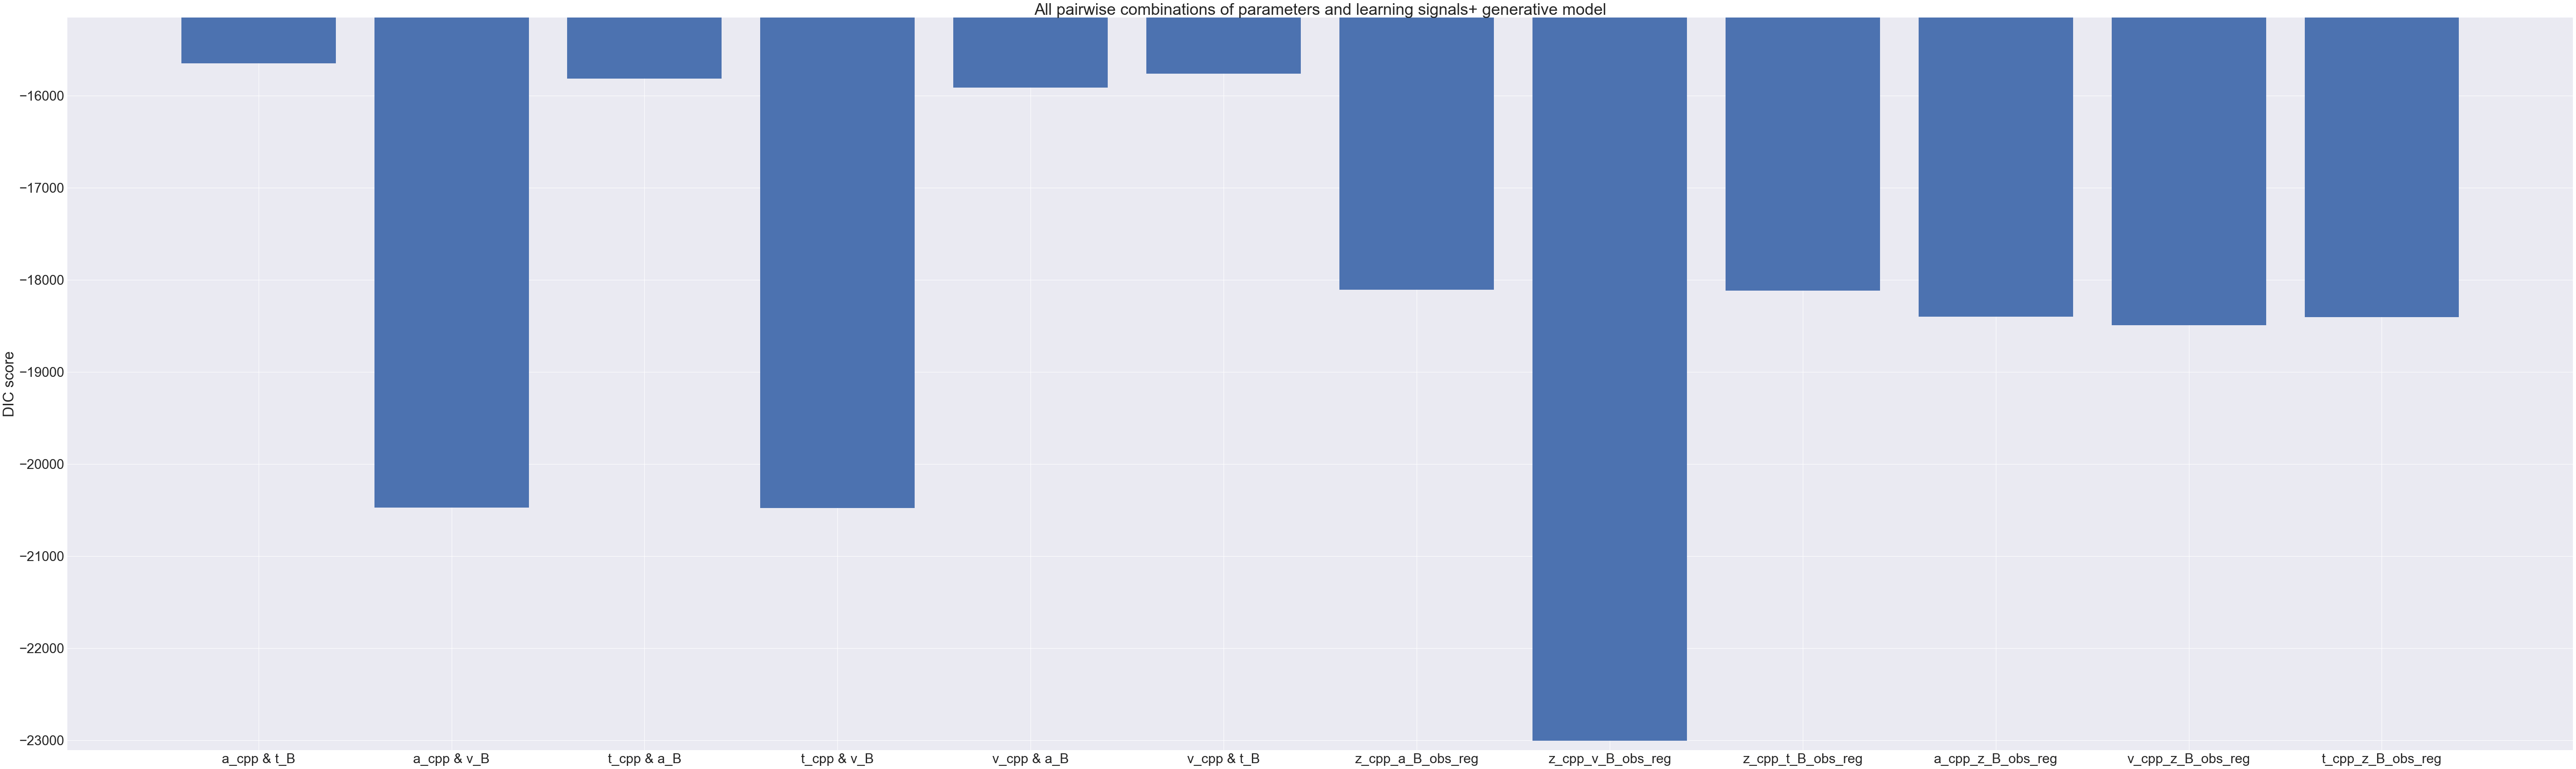

In [14]:
plt.figure(figsize=(100,30))
sns.set(font_scale=3)  
plt.bar(m_names, raw_dics)
plt.ylim(min(raw_dics) - 100, max(raw_dics) + 500)
plt.ylabel('DIC score')
plt.title('All pairwise combinations of parameters and learning signals+ generative model')

In [15]:
a_cpp_v_B_obs_reg.dic, t_cpp_v_B_obs_reg.dic

(-20474.848467528172, -20478.797590366743)

# Plot posteriors of regression coefficients

In [20]:
#plot posteriors for winning model 
v_B_sec = t_cpp_v_B_obs_reg.nodes_db.ix['v_B', 'node']
t_cpp_sec = t_cpp_v_B_obs_reg.nodes_db.ix['t_cpp', 'node']

v_B_gen = a_cpp_v_B_obs_reg.nodes_db.ix['v_B', 'node']
a_cpp_gen = a_cpp_v_B_obs_reg.nodes_db.ix['a_cpp', 'node']

Text(0.5,0,'$\\beta_{v\\textasciitilde B}$')

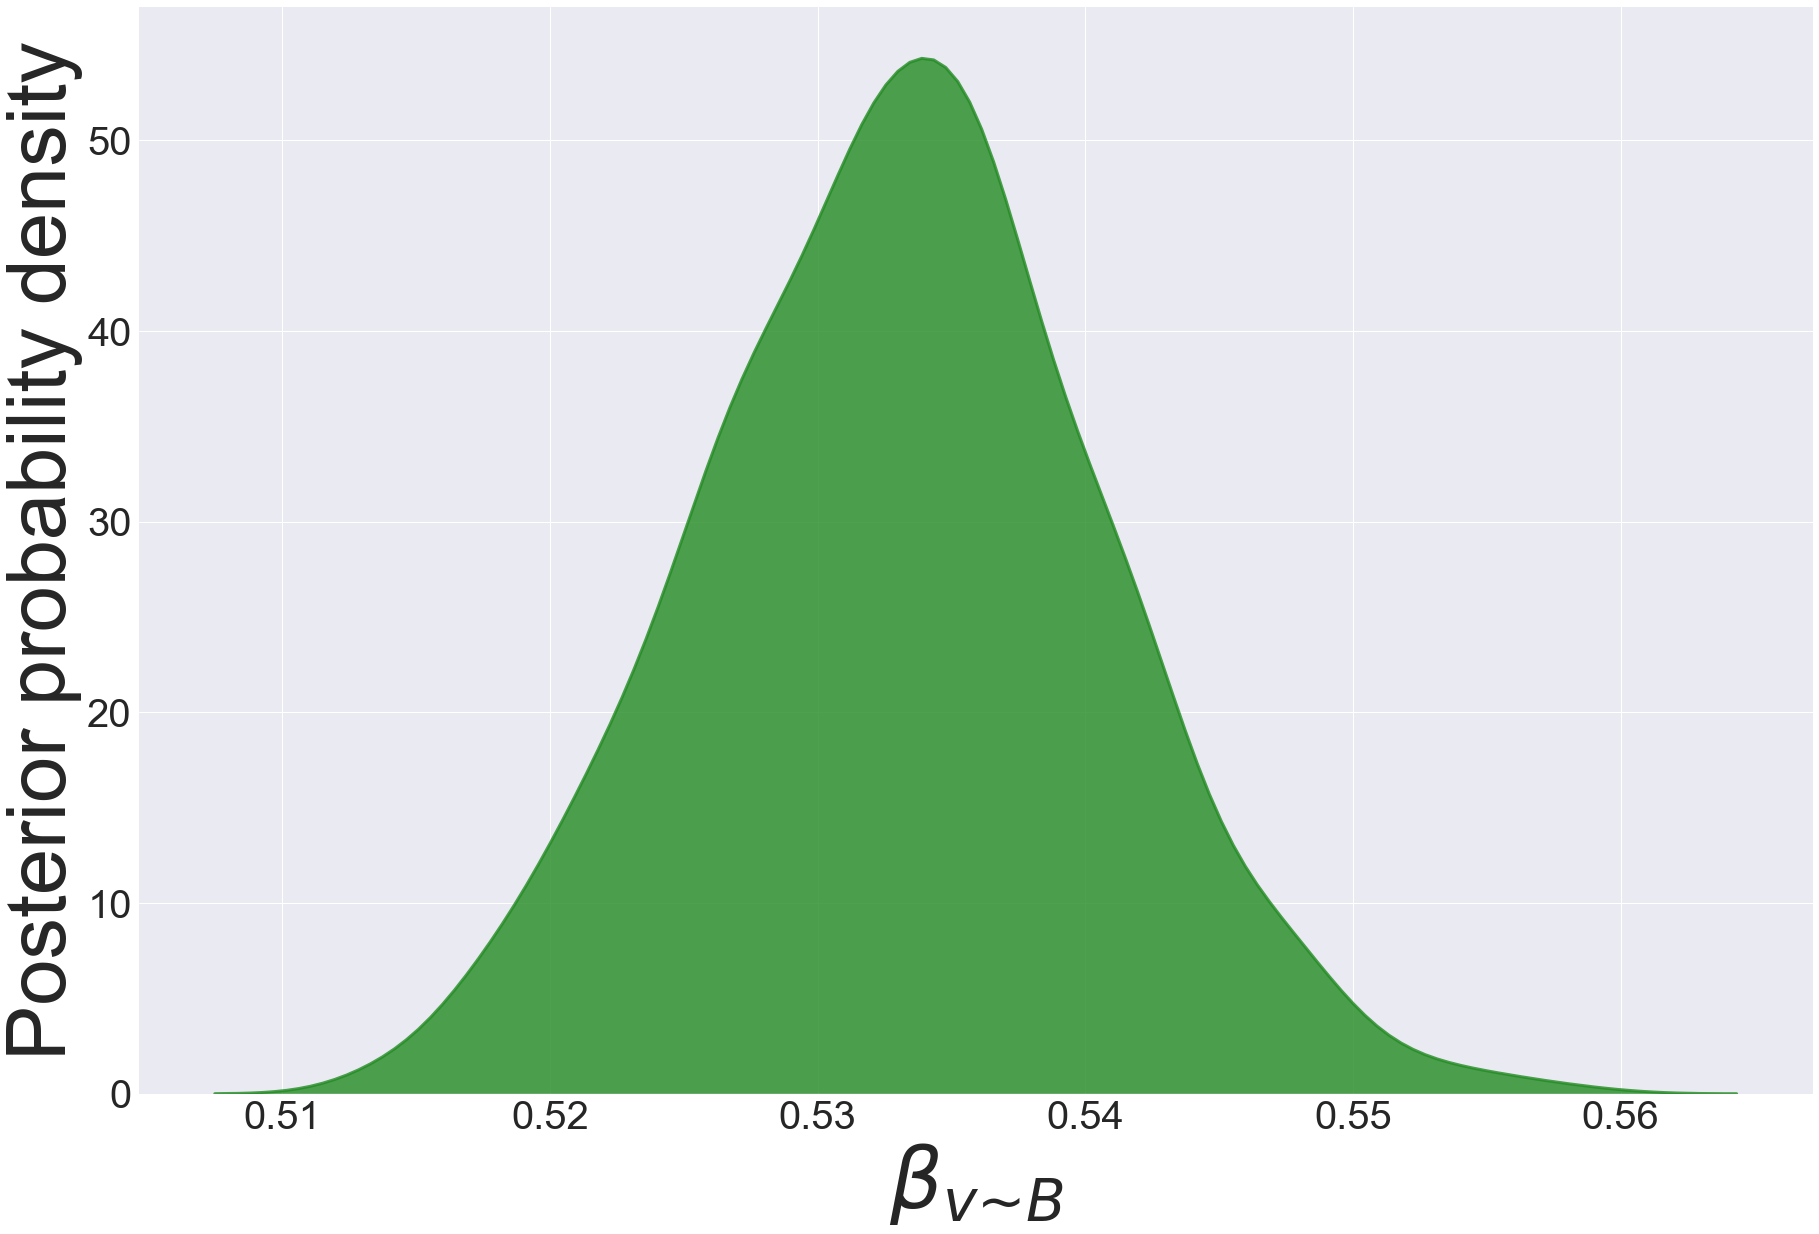

In [21]:
sns.set(font_scale=4) 
plt.figure(figsize=(30,20))
sns.distplot(v_B_gen.trace(), hist=False,rug=False,color='forestgreen', kde_kws = {'shade': True, 'linewidth': 3,                                                                                                'alpha': .8})
plt.ylabel('Posterior probability density', fontsize='xx-large')
plt.xlabel(r'$\beta_{v\textasciitilde B}$',fontsize='xx-large')

Text(0.5,0,'$\\beta_{a\\textasciitilde \\Omega}$')

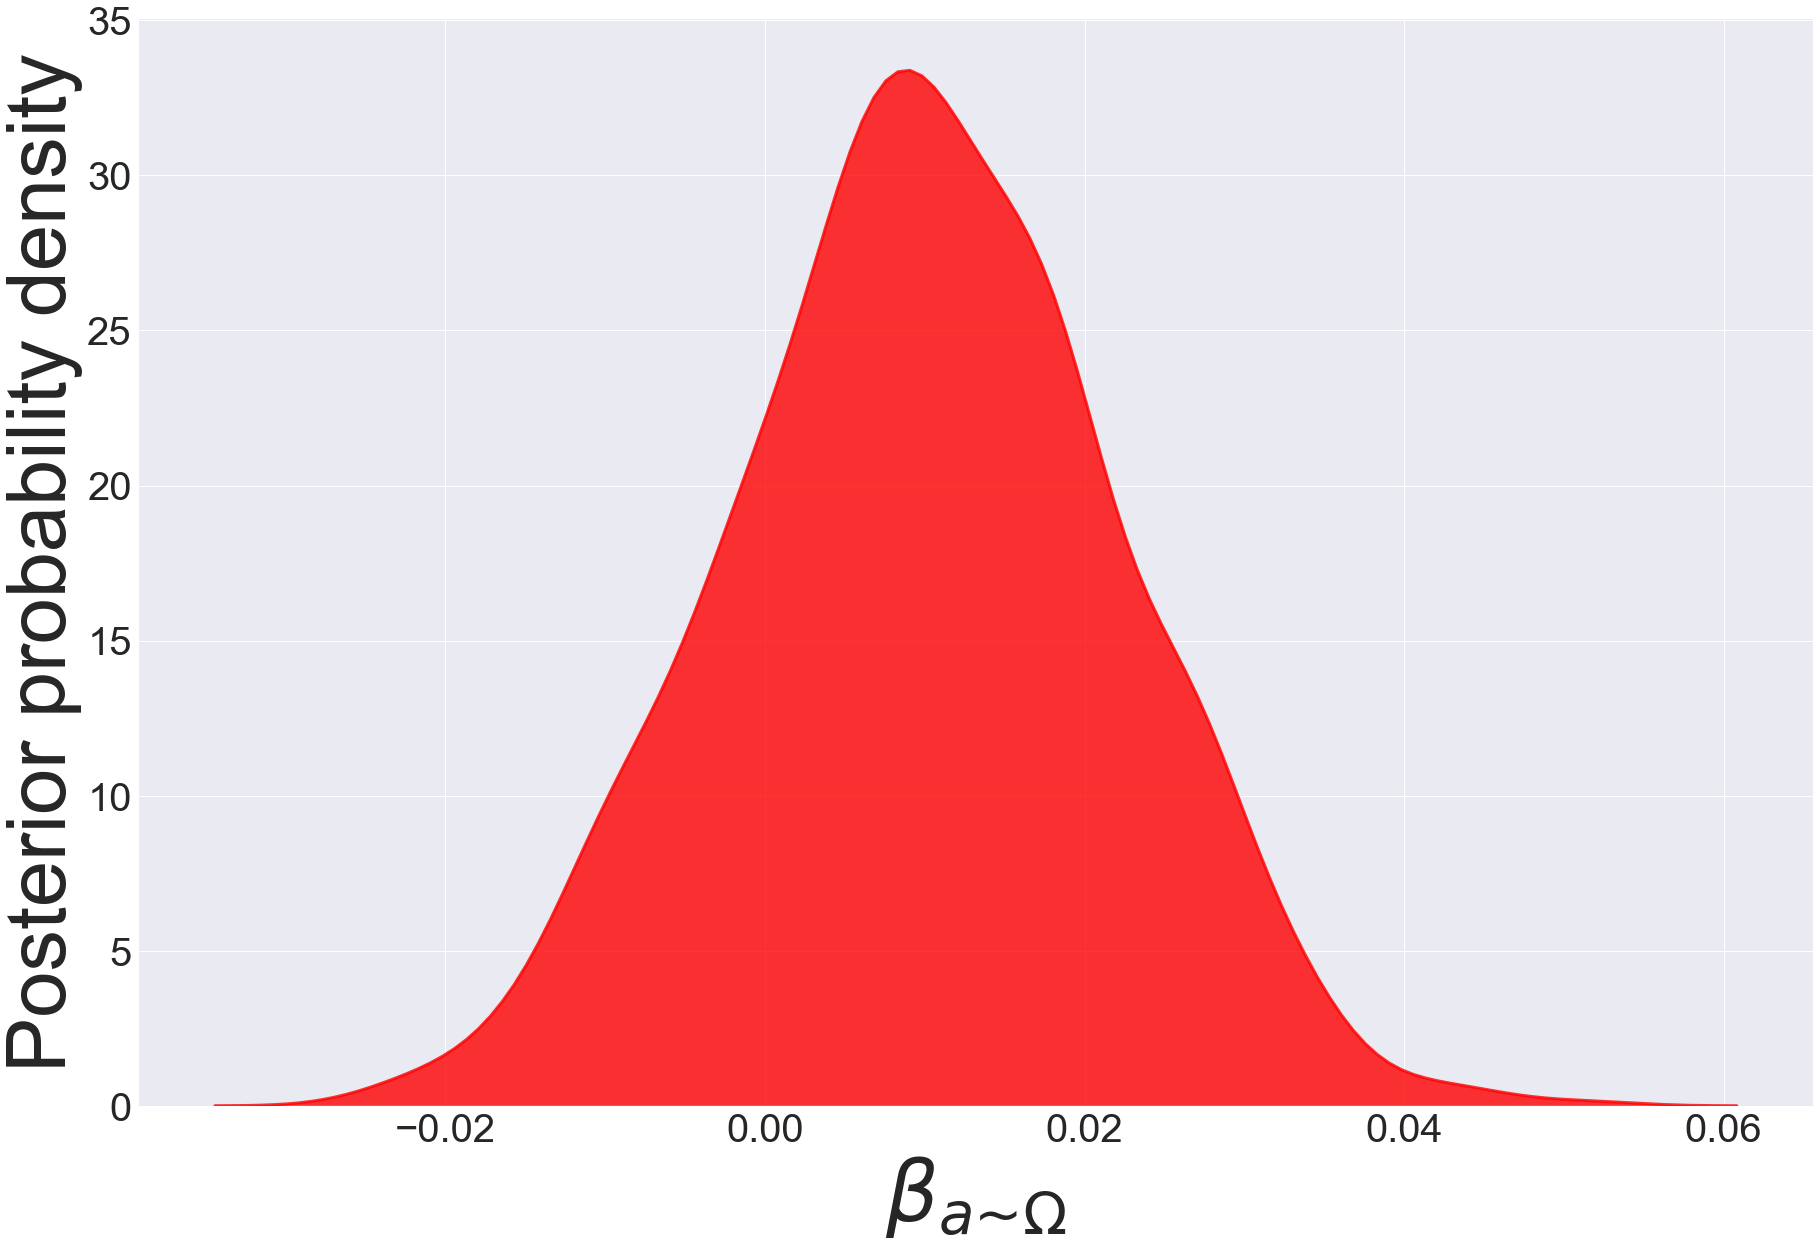

In [22]:
sns.set(font_scale=4) 
plt.figure(figsize=(30,20))
sns.distplot(a_cpp.trace(), hist=False,rug=False,color='red', kde_kws = {'shade': True, 'linewidth': 3,                                                                                                'alpha': .8})
plt.ylabel('Posterior probability density', fontsize='xx-large')
plt.xlabel(r'$\beta_{a\textasciitilde \Omega}$',fontsize='xx-large')

Text(0.5,0,'$\\beta_{v\\textasciitilde B}$')

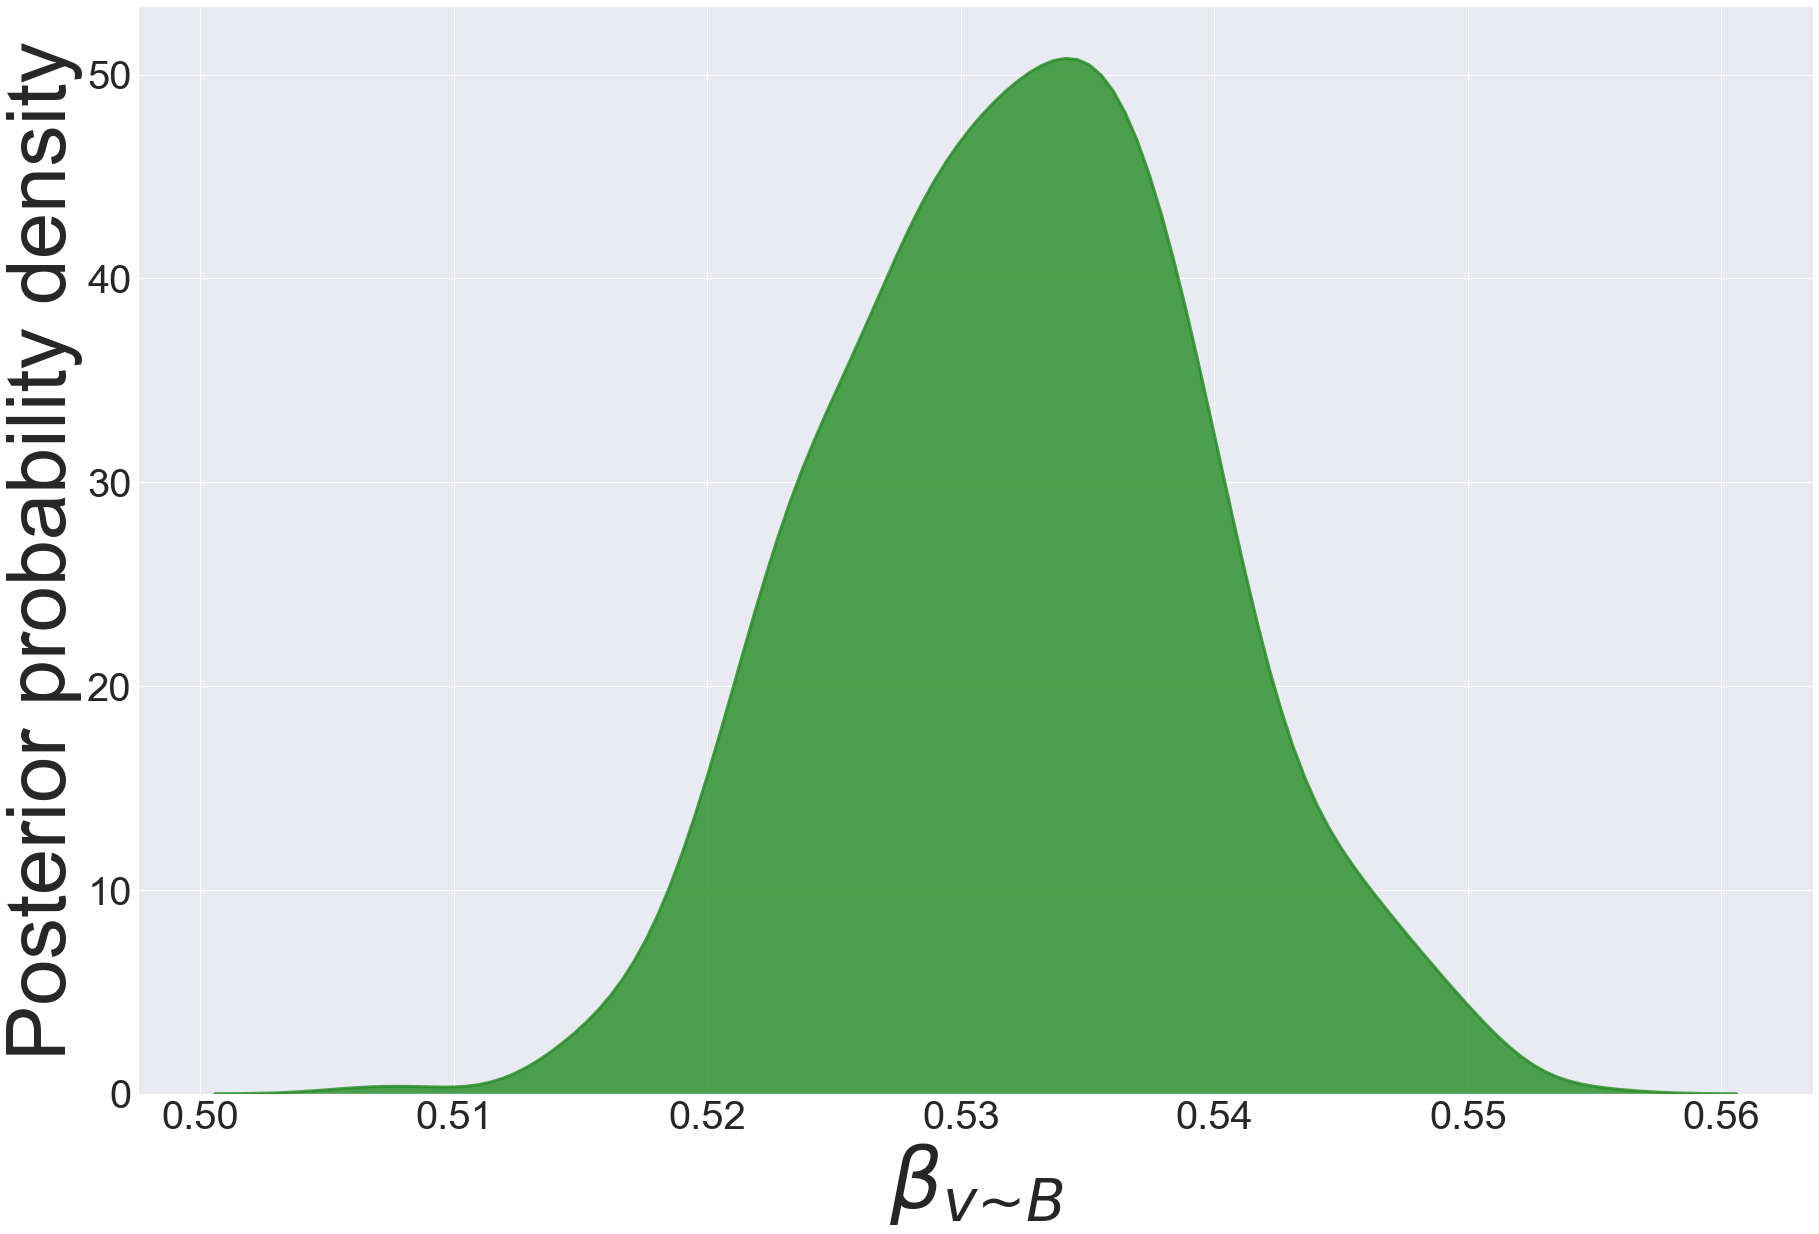

In [26]:
sns.set(font_scale=4) 
plt.figure(figsize=(30,20))
sns.distplot(v_B_sec.trace(), hist=False,rug=False,color='forestgreen', kde_kws = {'shade': True, 'linewidth': 3,                                                                                                'alpha': .8})
plt.ylabel('Posterior probability density', fontsize='xx-large')
plt.xlabel(r'$\beta_{v\textasciitilde B}$',fontsize='xx-large')

Text(0.5,0,'$\\beta_{t\\textasciitilde \\Omega}$')

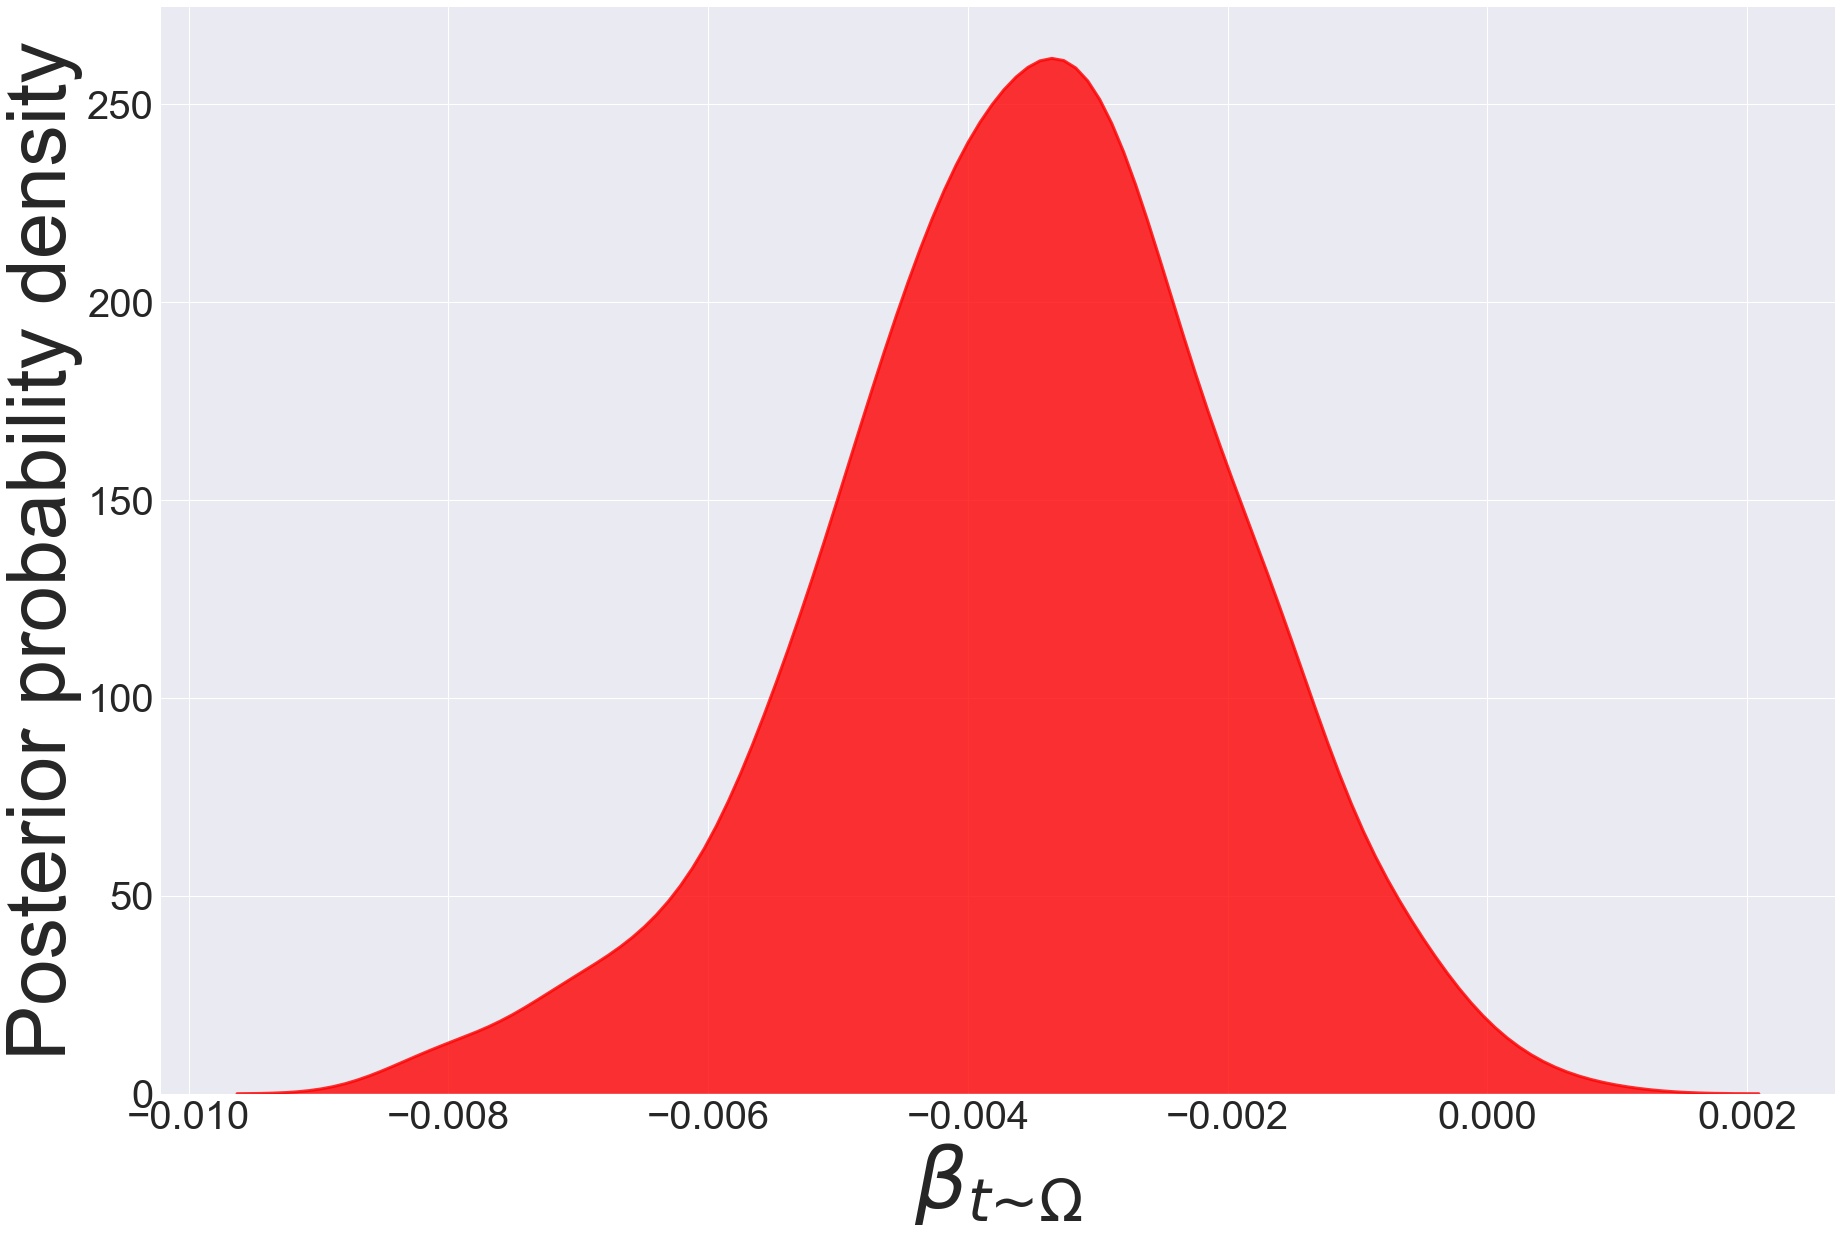

In [25]:
sns.set(font_scale=4) 
plt.figure(figsize=(30,20))
sns.distplot(t_cpp_sec.trace(), hist=False,rug=False,color='red', kde_kws = {'shade': True, 'linewidth': 3,                                                                                                'alpha': .8})
plt.ylabel('Posterior probability density', fontsize='xx-large')
plt.xlabel(r'$\beta_{t\textasciitilde \Omega}$',fontsize='xx-large')

In [50]:
print("P(a_cpp > 0) = ", (a_cpp.trace() > 0).mean())

P(a_cpp > 0) =  0.904210526316


In [51]:
print("P(v_B < 0) = ", (v_B.trace() > 0).mean())

print("P(t_cpp < 0) = ", (t_cpp.trace() < 0).mean())
print("P(t_cpp > 0) = ", (t_cpp.trace() > 0).mean())

P(v_B < 0) =  1.0


NameError: name 't_cpp' is not defined

In [90]:
v0 = a_cpp_v_B_obs_reg.nodes_db.ix[['v_Intercept'], 'mean'][0]
v_beta = a_cpp_v_B_obs_reg.nodes_db.ix[['v_B'], 'mean'][0]

In [94]:
a0 = a_cpp_v_B_obs_reg.nodes_db.ix[['a_Intercept'], 'mean'][0]
a_beta = a_cpp_v_B_obs_reg.nodes_db.ix[['a_cpp'], 'mean'][0]

In [96]:
v0+v_beta, a0+a_beta

(1.3015932421439282, 1.0628257257847002)

In [111]:
#store all of the regression estimates 
all_obs_reg_data['v_reg'] = v0 + v_beta * all_obs_reg_data['ideal_B'] 
all_obs_reg_data['a_reg'] = a0 + a_beta * all_obs_reg_data['cpp'] 

In [113]:
all_obs_reg_data.to_csv('/Users/Krista/Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/aggregated_data/all_reg_obs_data.csv')

In [ ]:
# model_names_header = ', '.join(m_names)
# print_dics = np.column_stack(dics)
# np.savetxt(write_dir+'sim_test_gen_model.csv', print_dics, header=model_names_header, delimiter=',',comments='')